In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data preparation

In [53]:
df=pd.read_csv('ZomatoRestaurantsIndia.csv')

In [54]:
df.head(3)

res_id                            name establishment  \
0  3400299                     Bikanervala   Quick Bites   
1  3400005  Mama Chicken Mama Franky House   Quick Bites   
2  3401013                   Bhagat Halwai   Quick Bites   

                                                 url  \
0  https://www.zomato.com/agra/bikanervala-khanda...   
1  https://www.zomato.com/agra/mama-chicken-mama-...   
2  https://www.zomato.com/agra/bhagat-halwai-2-sh...   

                                             address  city  city_id  \
0  Kalyani Point, Near Tulsi Cinema, Bypass Road,...  Agra       34   
1        Main Market, Sadar Bazaar, Agra Cantt, Agra  Agra       34   
2  62/1, Near Easy Day, West Shivaji Nagar, Goalp...  Agra       34   

     locality   latitude  longitude  ... price_range  currency  \
0    Khandari  27.211450  78.002381  ...           2       Rs.   
1  Agra Cantt  27.160569  78.011583  ...           2       Rs.   
2    Shahganj  27.182938  77.979684  ...           1       Rs.   

                                          highlights aggregate_rating  \
0  Lunch, Takeaway Available, Credit Card, Dinner...              4.4   
1  Delivery, No Alcohol Available, Dinner, Takeaw...              4.4   
2  No Alcohol Available, Dinner, Takeaway Availab...              4.2   

  rating_text  votes  photo_count opentable_support delivery  takeaway  
0   Very Good    814          154               0.0       -1        -1  
1   Very Good   1203          161               0.0       -1        -1  
2   Very Good    801          107               0.0        1        -1  

[3 rows x 26 columns]

In [55]:
df.shape                       # shape of dataframe.

(211944, 26)

In [56]:
df.info()                        # information of all columns.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211944 entries, 0 to 211943
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   res_id                211944 non-null  int64  
 1   name                  211944 non-null  object 
 2   establishment         207117 non-null  object 
 3   url                   211944 non-null  object 
 4   address               211810 non-null  object 
 5   city                  211944 non-null  object 
 6   city_id               211944 non-null  int64  
 7   locality              211944 non-null  object 
 8   latitude              211944 non-null  float64
 9   longitude             211944 non-null  float64
 10  zipcode               48757 non-null   object 
 11  country_id            211944 non-null  int64  
 12  locality_verbose      211944 non-null  object 
 13  cuisines              210553 non-null  object 
 14  timings               208070 non-null  object 
 15  

In [57]:
df.describe()   # statistical information of all numeric columns

res_id        city_id       latitude      longitude  country_id  \
count  2.119440e+05  211944.000000  211944.000000  211944.000000    211944.0   
mean   1.349411e+07    4746.785434      21.499805      77.615276         1.0   
std    7.883722e+06    5568.766386      22.781315       7.500104         0.0   
min    5.000000e+01       1.000000       0.000000       0.000000         1.0   
25%    3.301027e+06      11.000000      15.496071      74.877961         1.0   
50%    1.869573e+07      34.000000      22.514494      77.425971         1.0   
75%    1.881297e+07   11306.000000      26.841667      80.219323         1.0   
max    1.915979e+07   11354.000000   10000.000000      91.832769         1.0   

       average_cost_for_two    price_range  aggregate_rating          votes  \
count         211944.000000  211944.000000     211944.000000  211944.000000   
mean             595.812229       1.882535          3.395937     378.002571   
std              606.239363       0.892989          1.283642     925.333106   
min                0.000000       1.000000          0.000000       0.000000   
25%              250.000000       1.000000          3.300000      16.000000   
50%              400.000000       2.000000          3.800000     100.000000   
75%              700.000000       2.000000          4.100000     362.000000   
max            30000.000000       4.000000          4.900000   42539.000000   

         photo_count  opentable_support       delivery  takeaway  
count  211944.000000           211896.0  211944.000000  211944.0  
mean      256.971224                0.0      -0.255907      -1.0  
std       867.668940                0.0       0.964172       0.0  
min         0.000000                0.0      -1.000000      -1.0  
25%         3.000000                0.0      -1.000000      -1.0  
50%        18.000000                0.0      -1.000000      -1.0  
75%       128.000000                0.0       1.000000      -1.0  
max     17702.000000                0.0       1.000000      -1.0

#  Data cleaning

## Remove null values

In [58]:
df.shape

(211944, 26)

In [59]:
df.isnull().sum()

res_id                       0
name                         0
establishment             4827
url                          0
address                    134
city                         0
city_id                      0
locality                     0
latitude                     0
longitude                    0
zipcode                 163187
country_id                   0
locality_verbose             0
cuisines                  1391
timings                   3874
average_cost_for_two         0
price_range                  0
currency                     0
highlights                2069
aggregate_rating             0
rating_text                  0
votes                        0
photo_count                  0
opentable_support           48
delivery                     0
takeaway                     0
dtype: int64

In [60]:
# since zipcode have more null values (>70%),It is advisable to drop that column
df.drop('zipcode',axis=1,inplace=True)

In [61]:
#now drop all the rows having null values.
df.dropna(inplace=True)

In [62]:
df.isnull().sum()

res_id                  0
name                    0
establishment           0
url                     0
address                 0
city                    0
city_id                 0
locality                0
latitude                0
longitude               0
country_id              0
locality_verbose        0
cuisines                0
timings                 0
average_cost_for_two    0
price_range             0
currency                0
highlights              0
aggregate_rating        0
rating_text             0
votes                   0
photo_count             0
opentable_support       0
delivery                0
takeaway                0
dtype: int64

In [63]:
df.shape

(202028, 25)

## Drop unneccesary columns.

In [64]:
df.shape

(202028, 25)

In [65]:
df.drop(['city_id','country_id','currency','timings','locality_verbose','url'],axis=1,inplace=True) # dropping all unneccesary columns.

In [66]:
df.shape

(202028, 19)

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 202028 entries, 0 to 211943
Data columns (total 19 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   res_id                202028 non-null  int64  
 1   name                  202028 non-null  object 
 2   establishment         202028 non-null  object 
 3   address               202028 non-null  object 
 4   city                  202028 non-null  object 
 5   locality              202028 non-null  object 
 6   latitude              202028 non-null  float64
 7   longitude             202028 non-null  float64
 8   cuisines              202028 non-null  object 
 9   average_cost_for_two  202028 non-null  int64  
 10  price_range           202028 non-null  int64  
 11  highlights            202028 non-null  object 
 12  aggregate_rating      202028 non-null  float64
 13  rating_text           202028 non-null  object 
 14  votes                 202028 non-null  int64  
 15  

## Checking data types for all columns

In [68]:
df.dtypes

res_id                    int64
name                     object
establishment            object
address                  object
city                     object
locality                 object
latitude                float64
longitude               float64
cuisines                 object
average_cost_for_two      int64
price_range               int64
highlights               object
aggregate_rating        float64
rating_text              object
votes                     int64
photo_count               int64
opentable_support       float64
delivery                  int64
takeaway                  int64
dtype: object

In [69]:
# we can say open table support should be should be int and remaining columns are having correct data types.
df.opentable_support.fillna(0,inplace=True)
df['opentable_support']=df.opentable_support.astype('int32')


In [70]:
df.dtypes

res_id                    int64
name                     object
establishment            object
address                  object
city                     object
locality                 object
latitude                float64
longitude               float64
cuisines                 object
average_cost_for_two      int64
price_range               int64
highlights               object
aggregate_rating        float64
rating_text              object
votes                     int64
photo_count               int64
opentable_support         int32
delivery                  int64
takeaway                  int64
dtype: object

## Sanity checks for all columns

### Some latitude and longitude values does not belong to India. Change them to null values and drop those rows. 

In [71]:
df.latitude.shape

(202028,)

In [72]:
len(df[df['latitude']<8.40000])+len(df[df['latitude']>37.6000])   

1205

In [73]:
df=df[~ ((df['latitude']<8.40000)|(df['latitude']>37.60000))]     # Dropping rows whose latitude does not belongs to India.

In [74]:
df.latitude.shape

(200823,)

In [75]:
df.longitude.shape

(200823,)

In [76]:
len(df[df['longitude']<68.7000])+len(df[df['longitude']>97.25000])   

35

In [77]:
df=df[~ ((df['longitude']<68.7000)|(df['latitude']>97.25000))]        # Dropping rows whose longitude does not belongs to India

In [78]:
df.longitude.shape

(200788,)

In [79]:
df.takeaway.value_counts()             # All right

-1    200788
Name: takeaway, dtype: int64

In [80]:
df.delivery.value_counts()           # it should have only two values either 0 or 1.so changing all -1 to 0.

-1    125048
 1     74798
 0       942
Name: delivery, dtype: int64

In [81]:
df['delivery']=df.delivery.apply(lambda x:0 if x==-1 else x)

In [82]:
df.delivery.value_counts()                  # All right

0    125990
1     74798
Name: delivery, dtype: int64

In [83]:
df.rating_text.value_counts()                 # All right

Very Good        63742
Good             60825
Average          39289
Not rated        19907
Excellent        15409
Poor              1070
Çok iyi             54
Muito Bom           44
Excelente           41
Sangat Baik         41
Muy Bueno           35
Bardzo dobrze       29
Bom                 26
Skvělé              25
Harika              22
Baik                22
Velmi dobré         21
İyi                 19
Ottimo              18
Terbaik             16
Veľmi dobré         16
Buono               13
Skvělá volba        12
Bueno               11
Dobré               10
Dobrze               9
Eccellente           8
Wybitnie             8
Vynikajúce           7
Průměr               6
Muito bom            6
Promedio             5
Média                5
Media                3
Scarso               3
Priemer              3
Ortalama             3
Średnio              3
Biasa                2
Name: rating_text, dtype: int64

In [84]:
df.opentable_support.value_counts()              

0    200788
Name: opentable_support, dtype: int64

In [85]:
df.opentable_support.value_counts()              # we also handled null values in this column.

0    200788
Name: opentable_support, dtype: int64

In [86]:
df.aggregate_rating.value_counts().sort_values()         #  convert them into float

1.8        4
1.9       14
2.0       22
2.1       47
2.2      121
2.3      311
2.4      554
2.5      672
2.6      944
2.7     1432
4.9     1483
4.8     1710
2.8     2024
4.7     2291
2.9     2417
3.0     2793
3.1     3020
4.6     3974
4.5     6078
4.4     7521
3.4     7612
3.3     8601
3.5     8677
3.6     9803
3.2     9804
4.3    10648
3.7    12058
4.2    13330
3.8    14616
4.1    15474
3.9    15793
4.0    17033
0.0    19907
Name: aggregate_rating, dtype: int64

In [87]:
df['aggregate_rating']=df.aggregate_rating.astype('float')          # All right.

In [88]:
df.highlights=df.highlights.apply(lambda x: str(str(x).replace(' ','')))

In [89]:
df.highlights.value_counts()

Dinner,TakeawayAvailable,Lunch,Cash,IndoorSeating                                                                                                      3199
Dinner,Delivery,Lunch,Cash,TakeawayAvailable,IndoorSeating                                                                                             2452
Dinner,Cash,TakeawayAvailable,DebitCard,Lunch,Delivery,CreditCard,IndoorSeating,AirConditioned                                                         1197
Lunch,Cash,TakeawayAvailable,NoAlcoholAvailable,Dinner,Delivery,IndoorSeating                                                                          1063
Lunch,Cash,NoAlcoholAvailable,Dinner,TakeawayAvailable,IndoorSeating                                                                                    994
                                                                                                                                                       ... 
TakeawayAvailable,Delivery,Dinner,DebitCard,CreditCard,NoAlcohol

In [90]:
df.price_range.value_counts()            # This column is similar to binning.It divides the hotels into four ranges based on average prices.
                                        # All right.

1    77981
2    75081
3    35289
4    12437
Name: price_range, dtype: int64

In [91]:
df.average_cost_for_two.value_counts().sort_values()       # we can see values as 0 , 1, 2 which are not possible values  for this columns.

320         1
1230        1
380         1
1020        1
2           1
        ...  
600     12623
200     18660
400     21029
300     21355
500     21542
Name: average_cost_for_two, Length: 140, dtype: int64

In [92]:
# Average cost for two persons cannot be less than 100. So drop all the rows not satisfying the condition.
df=df[~(df['average_cost_for_two']<100)]

In [93]:
df.shape              # 2987 records are dropped.

(198932, 19)

In [94]:
pd.unique(df.average_cost_for_two).min()  # we can see that minimun value is 100 now.

100

In [95]:
df.cuisines=df.cuisines.apply(lambda x:str(x).replace(' ',''))           

In [96]:
len(df.cuisines.value_counts())

8876

In [97]:
df.name.value_counts()

Dominos Pizza                   3146
KFC                             1320
Cafe Coffee Day                 1040
Pizza Hut                        984
Subway                           775
                                ... 
Cafe Red Mango                     1
Cinnamon Bakery & Patisserie       1
Bindhadi Ki Rasoi                  1
Janatha Cafe                       1
JW Marriott Food Truck             1
Name: name, Length: 37292, dtype: int64

## Duplicate values

In [98]:
df[df['res_id']==122]              # we have 11  same values for res_id 122(duplicates)

res_id            name  establishment  \
53956     122  Lazeez Affaire  Casual Dining   
54026     122  Lazeez Affaire  Casual Dining   
55988     122  Lazeez Affaire  Casual Dining   
56525     122  Lazeez Affaire  Casual Dining   
57635     122  Lazeez Affaire  Casual Dining   
57903     122  Lazeez Affaire  Casual Dining   
58141     122  Lazeez Affaire  Casual Dining   
58371     122  Lazeez Affaire  Casual Dining   
58643     122  Lazeez Affaire  Casual Dining   
58781     122  Lazeez Affaire  Casual Dining   
59183     122  Lazeez Affaire  Casual Dining   
59421     122  Lazeez Affaire  Casual Dining   
59651     122  Lazeez Affaire  Casual Dining   

                                                 address       city  \
53956  6/48, Malcha Marg Market, Chanakyapuri, New Delhi  New Delhi   
54026  6/48, Malcha Marg Market, Chanakyapuri, New Delhi  New Delhi   
55988  6/48, Malcha Marg Market, Chanakyapuri, New Delhi  New Delhi   
56525  6/48, Malcha Marg Market, Chanakyapuri, New Delhi  New Delhi   
57635  6/48, Malcha Marg Market, Chanakyapuri, New Delhi  New Delhi   
57903  6/48, Malcha Marg Market, Chanakyapuri, New Delhi  New Delhi   
58141  6/48, Malcha Marg Market, Chanakyapuri, New Delhi  New Delhi   
58371  6/48, Malcha Marg Market, Chanakyapuri, New Delhi  New Delhi   
58643  6/48, Malcha Marg Market, Chanakyapuri, New Delhi  New Delhi   
58781  6/48, Malcha Marg Market, Chanakyapuri, New Delhi  New Delhi   
59183  6/48, Malcha Marg Market, Chanakyapuri, New Delhi  New Delhi   
59421  6/48, Malcha Marg Market, Chanakyapuri, New Delhi  New Delhi   
59651  6/48, Malcha Marg Market, Chanakyapuri, New Delhi  New Delhi   

           locality   latitude  longitude             cuisines  \
53956  Chanakyapuri  28.602231  77.186106  NorthIndian,Mughlai   
54026  Chanakyapuri  28.602231  77.186106  NorthIndian,Mughlai   
55988  Chanakyapuri  28.602231  77.186106  NorthIndian,Mughlai   
56525  Chanakyapuri  28.602231  77.186106  NorthIndian,Mughlai   
57635  Chanakyapuri  28.602231  77.186106  NorthIndian,Mughlai   
57903  Chanakyapuri  28.602231  77.186106  NorthIndian,Mughlai   
58141  Chanakyapuri  28.602231  77.186106  NorthIndian,Mughlai   
58371  Chanakyapuri  28.602231  77.186106  NorthIndian,Mughlai   
58643  Chanakyapuri  28.602231  77.186106  NorthIndian,Mughlai   
58781  Chanakyapuri  28.602231  77.186106  NorthIndian,Mughlai   
59183  Chanakyapuri  28.602231  77.186106  NorthIndian,Mughlai   
59421  Chanakyapuri  28.602231  77.186106  NorthIndian,Mughlai   
59651  Chanakyapuri  28.602231  77.186106  NorthIndian,Mughlai   

       average_cost_for_two  price_range  \
53956                  2000            4   
54026                  2000            4   
55988                  2000            4   
56525                  2000            4   
57635                  2000            4   
57903                  2000            4   
58141                  2000            4   
58371                  2000            4   
58643                  2000            4   
58781                  2000            4   
59183                  2000            4   
59421                  2000            4   
59651                  2000            4   

                                              highlights  aggregate_rating  \
53956  Cash,CreditCard,DebitCard,Delivery,TakeawayAva...               4.8   
54026  Cash,CreditCard,DebitCard,Delivery,TakeawayAva...               4.8   
55988  Cash,CreditCard,DebitCard,Delivery,TakeawayAva...               4.8   
56525  Cash,CreditCard,DebitCard,Delivery,TakeawayAva...               4.8   
57635  Cash,CreditCard,DebitCard,Delivery,TakeawayAva...               4.8   
57903  Cash,CreditCard,DebitCard,Delivery,TakeawayAva...               4.8   
58141  Cash,CreditCard,DebitCard,Delivery,TakeawayAva...               4.8   
58371  Cash,CreditCard,DebitCard,Delivery,TakeawayAva...               4.8   
58643  Cash,CreditCard,DebitCard,Delivery,TakeawayAva...               4.8   
58781  Cash,Credi

In [99]:
df.shape

(198932, 19)

In [100]:
df.drop_duplicates(subset='res_id',keep='first',inplace=True)

In [101]:
df.shape

(50692, 19)

In [51]:
#  Data cleaning process completed.

# Data Understanding and Visualization

## Final Data set after cleaning process

In [52]:
df.head(3)

res_id                            name establishment  \
0  3400299                     Bikanervala   Quick Bites   
1  3400005  Mama Chicken Mama Franky House   Quick Bites   
2  3401013                   Bhagat Halwai   Quick Bites   

                                             address  city    locality  \
0  Kalyani Point, Near Tulsi Cinema, Bypass Road,...  Agra    Khandari   
1        Main Market, Sadar Bazaar, Agra Cantt, Agra  Agra  Agra Cantt   
2  62/1, Near Easy Day, West Shivaji Nagar, Goalp...  Agra    Shahganj   

    latitude  longitude                                           cuisines  \
0  27.211450  78.002381  NorthIndian,SouthIndian,Mithai,StreetFood,Dess...   
1  27.160569  78.011583  NorthIndian,Mughlai,Rolls,Chinese,FastFood,Str...   
2  27.182938  77.979684                                    FastFood,Mithai   

   average_cost_for_two  price_range  \
0                   700            2   
1                   600            2   
2                   300            1   

                                          highlights  aggregate_rating  \
0  Lunch,TakeawayAvailable,CreditCard,Dinner,Cash...               4.4   
1  Delivery,NoAlcoholAvailable,Dinner,TakeawayAva...               4.4   
2  NoAlcoholAvailable,Dinner,TakeawayAvailable,Br...               4.2   

  rating_text  votes  photo_count  opentable_support  delivery  takeaway  
0   Very Good    814          154                  0         0        -1  
1   Very Good   1203          161                  0         0        -1  
2   Very Good    801          107                  0         1        -1

In [53]:
df.shape

(50692, 19)

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50692 entries, 0 to 211942
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   res_id                50692 non-null  int64  
 1   name                  50692 non-null  object 
 2   establishment         50692 non-null  object 
 3   address               50692 non-null  object 
 4   city                  50692 non-null  object 
 5   locality              50692 non-null  object 
 6   latitude              50692 non-null  float64
 7   longitude             50692 non-null  float64
 8   cuisines              50692 non-null  object 
 9   average_cost_for_two  50692 non-null  int64  
 10  price_range           50692 non-null  int64  
 11  highlights            50692 non-null  object 
 12  aggregate_rating      50692 non-null  float64
 13  rating_text           50692 non-null  object 
 14  votes                 50692 non-null  int64  
 15  photo_count       

In [55]:
df.describe()

res_id      latitude     longitude  average_cost_for_two  \
count  5.069200e+04  50692.000000  50692.000000          50692.000000   
mean   1.277017e+07     21.577362     77.849604            552.258187   
std    8.227061e+06      6.436169      4.302687            608.947374   
min    5.000000e+01      8.400144     69.609166            100.000000   
25%    2.900010e+06     17.343475     74.845574            200.000000   
50%    1.867856e+07     22.506147     77.154986            400.000000   
75%    1.882370e+07     26.761216     79.933693            600.000000   
max    1.915929e+07     34.214702     91.832769          30000.000000   

        price_range  aggregate_rating         votes   photo_count  \
count  50692.000000      50692.000000  50692.000000  50692.000000   
mean       1.750690          3.053172    237.531563    173.560286   
std        0.888368          1.397596    641.529993    611.825495   
min        1.000000          0.000000      0.000000      0.000000   
25%        1.000000          3.000000      7.000000      2.000000   
50%        2.000000          3.500000     42.000000     12.000000   
75%        2.000000          3.900000    191.000000     78.000000   
max        4.000000          4.900000  42539.000000  17702.000000   

       opentable_support      delivery  takeaway  
count            50692.0  50692.000000   50692.0  
mean                 0.0      0.331926      -1.0  
std                  0.0      0.470909       0.0  
min                  0.0      0.000000      -1.0  
25%                  0.0      0.000000      -1.0  
50%                  0.0      0.000000      -1.0  
75%                  0.0      1.000000      -1.0  
max                  0.0      1.000000      -1.0

## Now create a new column called region dividing city column into five regions i.e, North,South,Central,Eastern,Western

In [56]:
len(pd.unique(df.city))

98

In [57]:
l=pd.unique(df.city)
sorted(l)

['Agra',
 'Ahmedabad',
 'Ajmer',
 'Alappuzha',
 'Allahabad',
 'Amravati',
 'Amritsar',
 'Aurangabad',
 'Bangalore',
 'Bhopal',
 'Bhubaneshwar',
 'Chandigarh',
 'Chennai',
 'Coimbatore',
 'Cuttack',
 'Darjeeling',
 'Dehradun',
 'Dharamshala',
 'Faridabad',
 'Gandhinagar',
 'Gangtok',
 'Ghaziabad',
 'Goa',
 'Gorakhpur',
 'Greater Noida',
 'Guntur',
 'Gurgaon',
 'Guwahati',
 'Gwalior',
 'Haridwar',
 'Howrah',
 'Hyderabad',
 'Indore',
 'Jabalpur',
 'Jaipur',
 'Jalandhar',
 'Jammu',
 'Jamnagar',
 'Jamshedpur',
 'Jhansi',
 'Jodhpur',
 'Junagadh',
 'Kanpur',
 'Kharagpur',
 'Kochi',
 'Kolhapur',
 'Kolkata',
 'Kota',
 'Lucknow',
 'Ludhiana',
 'Madurai',
 'Manali',
 'Mangalore',
 'Manipal',
 'Meerut',
 'Mohali',
 'Mumbai',
 'Mussoorie',
 'Mysore',
 'Nagpur',
 'Nainital',
 'Nashik',
 'Navi Mumbai',
 'Nayagaon',
 'Neemrana',
 'New Delhi',
 'Noida',
 'Ooty',
 'Palakkad',
 'Panchkula',
 'Patiala',
 'Patna',
 'Puducherry',
 'Pune',
 'Pushkar',
 'Raipur',
 'Rajkot',
 'Ranchi',
 'Rishikesh',
 'Salem',


In [58]:
north=['Zirakpur','Varanasi','Srinagar','Rishikesh','Patiala','Panchakula','Nayagaon','Nainital','Mussoorie','Mohali','Manali','Kanpur','Greater Noida','Shimla','New Delhi','Agra','Chandigarh','Amristar','Jaipur','Lucknow','Ghaziabad','Faridabad','Ludhiana','Meerut','Chandigarh','Gurgaon','Aligarh','Jalandhar','Gorakhpur','Dharamshala','Noida','Dehradun','Jhansi','Jammu','Haridwar']
south=['Goa','Vijayawada','Vizag','Vellore','Udupi','Trichy','Trivandrum','Thrissur','Ooty','Chennai','Hyderabad','Secunderabad','Tirupati','Alappuzha','Bangalore','Coimbatore','Guntur','Kochi','Madurai','Mangalore','Manipal','Mysore','Palakkad','Puducherry','Salem']
central=['Allahabad','Amravathi','Aurangabad','Bhopal','Gwalior','Indore','Jabalpur','Jamshedpur','Junagadh','Kolhapur','Nagpur','Nashik','Raipur']
east=['Kolkata','Bhubaneshwar','Cuttack','Darjeeling','Gangtok','Guwahati','Howrah','Jamnagar','Kharagpur','Patna','Ranchi','Siliguri']
west=['Mumbai','Gandhinagar','Kota','Navi Mumbai','Neemrana','Pune','Pushkar','Rajkot','Surat','Thane','Udaipur','Vadodara','Jodhpur','Ajmer']

In [59]:
len(north)+len(south)+len(east)+len(central)+len(west)  # no of cities mathces

99

In [60]:
def citi(x):
    if x in north:
        return 'North'
    elif x in south:
        return 'South'
    elif x in central:
        return 'Central'
    elif x in east:
        return 'East'
    else:
        return 'West'

In [61]:
df.insert(5,'region',df['city'].apply(citi))  # inserting region column after city_id column.

In [62]:
df.head(2)

res_id                            name establishment  \
0  3400299                     Bikanervala   Quick Bites   
1  3400005  Mama Chicken Mama Franky House   Quick Bites   

                                             address  city region    locality  \
0  Kalyani Point, Near Tulsi Cinema, Bypass Road,...  Agra  North    Khandari   
1        Main Market, Sadar Bazaar, Agra Cantt, Agra  Agra  North  Agra Cantt   

    latitude  longitude                                           cuisines  \
0  27.211450  78.002381  NorthIndian,SouthIndian,Mithai,StreetFood,Dess...   
1  27.160569  78.011583  NorthIndian,Mughlai,Rolls,Chinese,FastFood,Str...   

   average_cost_for_two  price_range  \
0                   700            2   
1                   600            2   

                                          highlights  aggregate_rating  \
0  Lunch,TakeawayAvailable,CreditCard,Dinner,Cash...               4.4   
1  Delivery,NoAlcoholAvailable,Dinner,TakeawayAva...               4.4   

  rating_text  votes  photo_count  opentable_support  delivery  takeaway  
0   Very Good    814          154                  0         0        -1  
1   Very Good   1203          161                  0         0        -1

In [63]:
df['region'].dtypes

dtype('O')

In [64]:
# check the column for null values.
df['region'].isnull().sum()                   # All right.

0

## Perform Visualization on each variable

## Uni-Variate Analysis

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50692 entries, 0 to 211942
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   res_id                50692 non-null  int64  
 1   name                  50692 non-null  object 
 2   establishment         50692 non-null  object 
 3   address               50692 non-null  object 
 4   city                  50692 non-null  object 
 5   region                50692 non-null  object 
 6   locality              50692 non-null  object 
 7   latitude              50692 non-null  float64
 8   longitude             50692 non-null  float64
 9   cuisines              50692 non-null  object 
 10  average_cost_for_two  50692 non-null  int64  
 11  price_range           50692 non-null  int64  
 12  highlights            50692 non-null  object 
 13  aggregate_rating      50692 non-null  float64
 14  rating_text           50692 non-null  object 
 15  votes             

In [68]:
        # count plot is used for plotting unique values of column and their counts.
plt.figure(figsize=[18,8])
g=sns.countplot(x='establishment',data=df)
g.set_xticklabels(g.get_xticklabels(),rotation=90)
g
plt.xticks(size = 15)
plt.yticks(size = 15)
for p in g.patches:
    g.annotate('{:.0f}'.format(p.get_height()),(p.get_x()+0.3,p.get_height()),ha='center',va='bottom',color='black',fontsize=14)
plt.show()

In [69]:
sns.boxplot(x=df.res_id,orient='v',color='green')
plt.show()                               # no outliers beacuse it is a continuos unique variable.

C:\Users\mybes\anaconda3\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


In [70]:
sns.distplot(df.res_id,color='green')
plt.show()

C:\Users\mybes\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


In [71]:
sns.boxplot(x=df.latitude,orient='v',color='green')
plt.show()                     # No outliers

C:\Users\mybes\anaconda3\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


In [72]:
sns.distplot(df.latitude,color='green')
plt.show() 

C:\Users\mybes\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


C:\Users\mybes\anaconda3\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


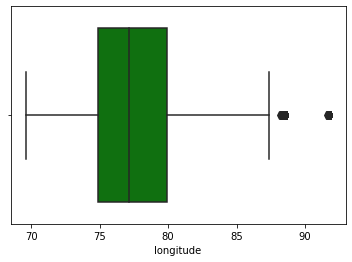

In [73]:
sns.boxplot(x=df.longitude,orient='v',color='green')
plt.show()               # here outliers indicates the restaurents which are far away from the retaurant which is median value.

C:\Users\mybes\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


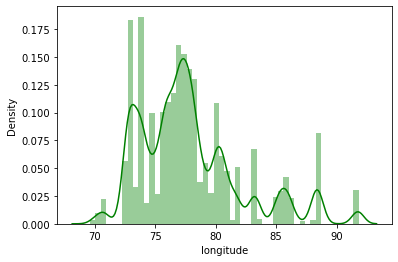

In [74]:
sns.distplot(df.longitude,color='green')
plt.show() 

C:\Users\mybes\anaconda3\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


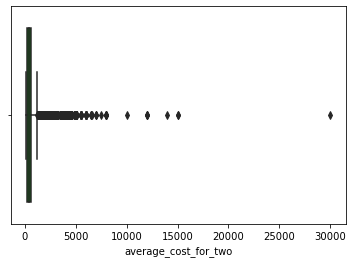

In [75]:
sns.boxplot(x=df.average_cost_for_two,orient='v',color='green')
plt.show()                    # there are more costly restaurants.

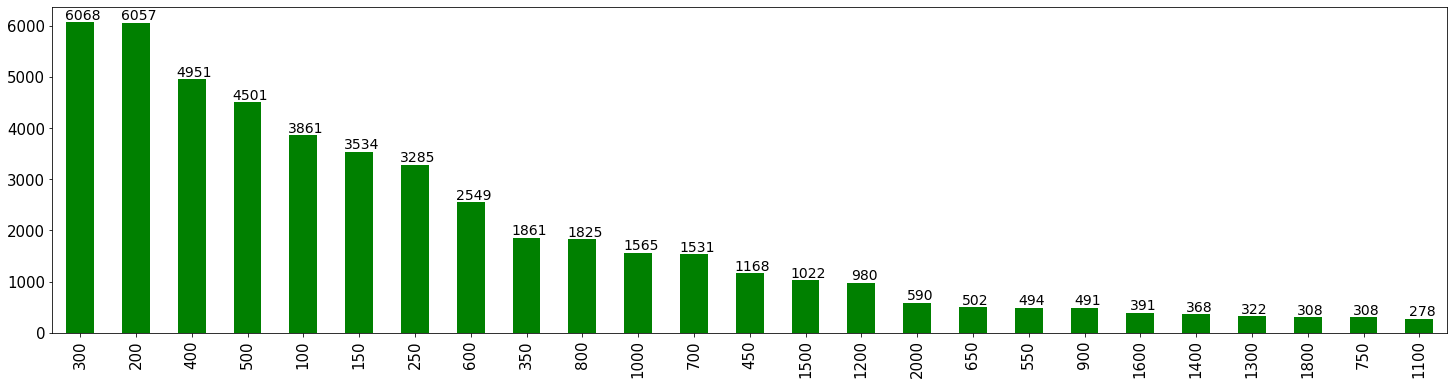

In [76]:
plt.figure(figsize=[25,6])
g=df.average_cost_for_two.value_counts().head(25).plot(kind='bar',color='green')
plt.xticks(size=15)
plt.yticks(size=15)
for p in g.patches:
    g.annotate('{:.0f}'.format(p.get_height()),(p.get_x()+0.3,p.get_height()),ha='center',va='bottom',color='black',fontsize=14)
plt.show()
# count of each average_cost_for_two value.

C:\Users\mybes\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


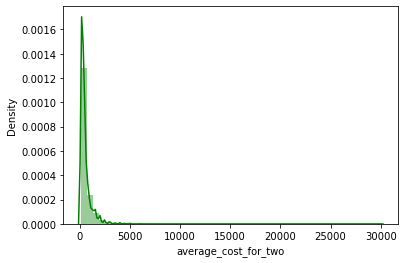

In [77]:
sns.distplot(df.average_cost_for_two,color='green')
plt.show()

C:\Users\mybes\anaconda3\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


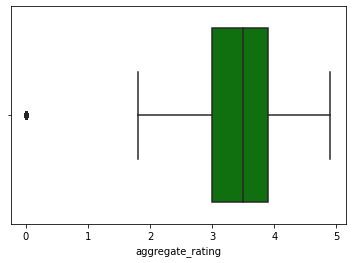

In [78]:
sns.boxplot(x=df.aggregate_rating,orient='v',color='green')
plt.show()          # hotels with 0 rating are the outliers.

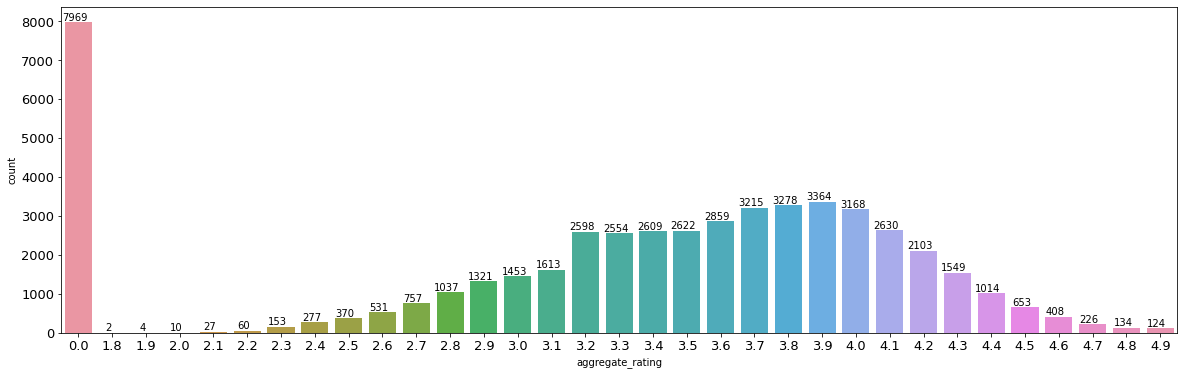

In [79]:
plt.figure(figsize=[20,6])
g=sns.countplot(x=df.aggregate_rating)
plt.xticks(size=13)
plt.yticks(size=13)
for p in g.patches:
        g.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),ha='center', va='bottom',color= 'black',fontsize=10)
plt.show()
# count of each aggregate_rating value.

C:\Users\mybes\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


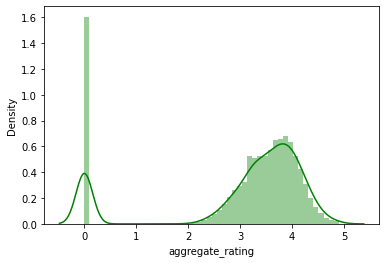

In [80]:
sns.distplot(df.aggregate_rating,color='green')
plt.show()

C:\Users\mybes\anaconda3\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


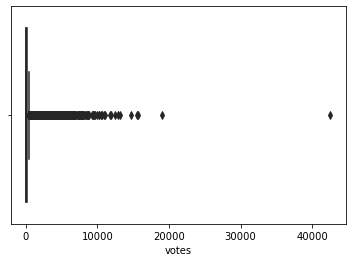

In [81]:
sns.boxplot(x=df.votes,orient='v',color='green')
plt.show()         

C:\Users\mybes\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


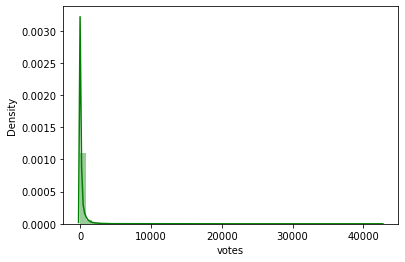

In [82]:
sns.distplot(df.votes,color='green')
plt.show()

C:\Users\mybes\anaconda3\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


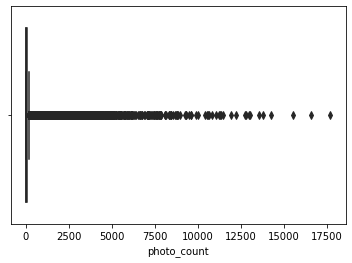

In [83]:
sns.boxplot(x=df.photo_count,orient='v',color='green')
plt.show()   

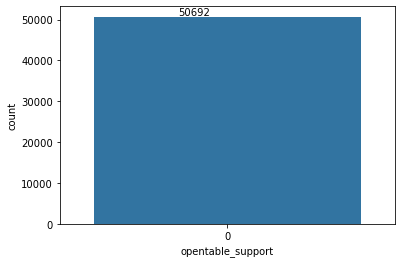

In [84]:
g=sns.countplot(x=df.opentable_support)
for p in g.patches:
        g.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),ha='center', va='bottom',color= 'black')
plt.show()

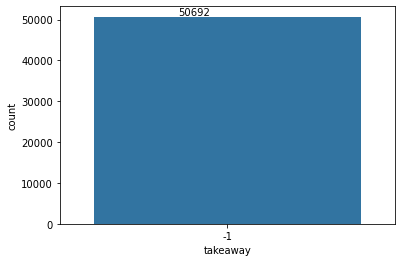

In [85]:
g=sns.countplot(x=df.takeaway)
for p in g.patches:
    g.annotate('{:.0f}'.format(p.get_height()),(p.get_x()+0.3,p.get_height()),ha='center',va='bottom',color='black')
plt.show()

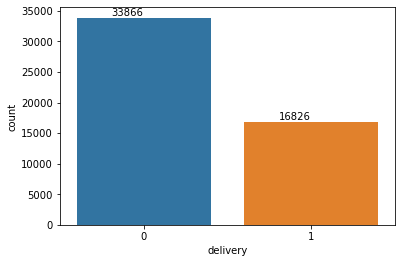

In [86]:
g=sns.countplot(x=df.delivery)
for p in g.patches:
    g.annotate('{:.0f}'.format(p.get_height()),(p.get_x()+0.3,p.get_height()),ha='center',va='bottom',color='black')
plt.show()

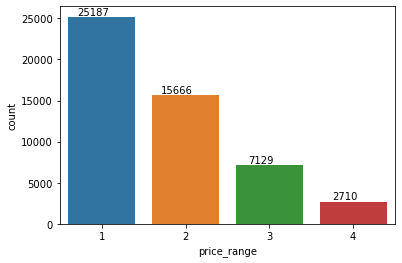

In [87]:
g=sns.countplot(x=df.price_range)
for i in g.patches:
    g.annotate('{:.0f}'.format(i.get_height()),(i.get_x()+0.3,i.get_height()),ha='center',va='bottom',color='black',fontsize=10)
plt.show()

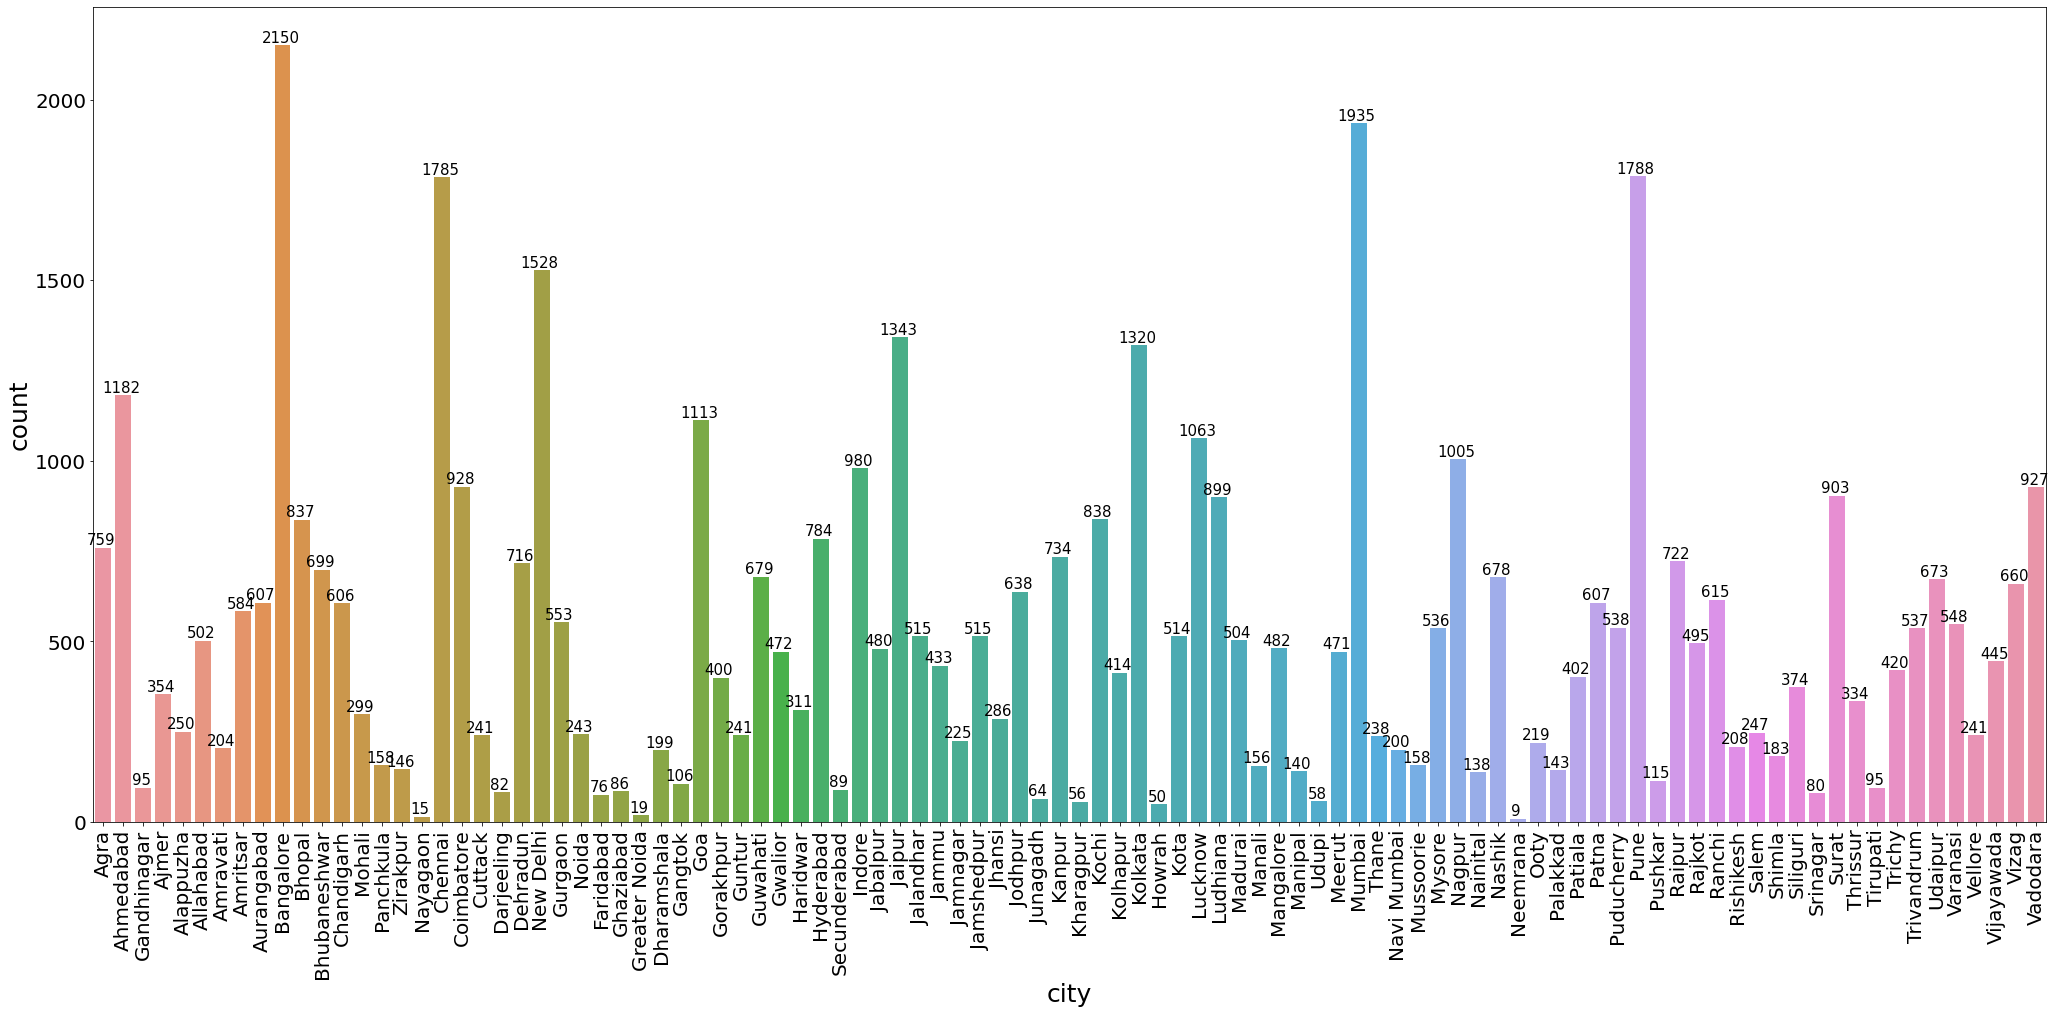

In [88]:
plt.figure(figsize=[35,15])
plt.xticks(size=20)
plt.yticks(size=20)
plt.xlabel('city',size=25)
plt.ylabel('count',size=25)
g=sns.countplot(x=df.city)
g.set_xticklabels(g.get_xticklabels(),rotation=90)
for i in g.patches:
    g.annotate('{:.0f}'.format(i.get_height()),(i.get_x()+0.3,i.get_height()),ha='center',va='bottom',color='black',fontsize=15)
plt.show()

In [89]:
plt.figure(figsize=[25,10])
plt.xticks(size=15)
plt.yticks(size=15)
plt.xlabel('rating_text',size=20)
plt.ylabel('count',size=20)
g=sns.countplot(x=df.rating_text)
g.set_xticklabels(g.get_xticklabels(),rotation=90)
for i in g.patches:
    g.annotate('{:.0f}'.format(i.get_height()),(i.get_x()+0.3,i.get_height()),ha='center',va='bottom',color='black',fontsize=13)
plt.show()

## Bi-Variate and Correlation Analysis

In [90]:
df.corr()                               # returns correlation matrix.

res_id  latitude  longitude  average_cost_for_two  \
res_id                1.000000  0.058516  -0.043586             -0.189208   
latitude              0.058516  1.000000   0.066005             -0.022801   
longitude            -0.043586  0.066005   1.000000             -0.057711   
average_cost_for_two -0.189208 -0.022801  -0.057711              1.000000   
price_range          -0.180305 -0.020580  -0.047272              0.784772   
aggregate_rating     -0.247349 -0.013467  -0.012187              0.234194   
votes                -0.200407 -0.049589  -0.029146              0.258073   
photo_count          -0.095113 -0.024281  -0.028686              0.307655   
opentable_support          NaN       NaN        NaN                   NaN   
delivery              0.025957  0.032684   0.016424             -0.068724   
takeaway                   NaN       NaN        NaN                   NaN   

                      price_range  aggregate_rating     votes  photo_count  \
res_id                  -0.180305         -0.247349 -0.200407    -0.095113   
latitude                -0.020580         -0.013467 -0.049589    -0.024281   
longitude               -0.047272         -0.012187 -0.029146    -0.028686   
average_cost_for_two     0.784772          0.234194  0.258073     0.307655   
price_range              1.000000          0.240228  0.241984     0.282097   
aggregate_rating         0.240228          1.000000  0.280122     0.232283   
votes                    0.241984          0.280122  1.000000     0.694999   
photo_count              0.282097          0.232283  0.694999     1.000000   
opentable_support             NaN               NaN       NaN          NaN   
delivery                -0.063336          0.221769  0.093582     0.054524   
takeaway                      NaN               NaN       NaN          NaN   

                      opentable_support  delivery  takeaway  
res_id                              NaN  0.025957       NaN  
latitude                            NaN  0.032684       NaN  
longitude                           NaN  0.016424       NaN  
average_cost_for_two                NaN -0.068724       NaN  
price_range                         NaN -0.063336       NaN  
aggregate_rating                    NaN  0.221769       NaN  
votes                               NaN  0.093582       NaN  
photo_count                         NaN  0.054524       NaN  
opentable_support                   NaN       NaN       NaN  
delivery                            NaN  1.000000       NaN  
takeaway                            NaN       NaN       NaN

In [91]:
df1=df.drop(['takeaway','opentable_support'],axis=1)         # drop those columns and store it as df1 to get rid of NaN values.

In [92]:
df1.corr()

res_id  latitude  longitude  average_cost_for_two  \
res_id                1.000000  0.058516  -0.043586             -0.189208   
latitude              0.058516  1.000000   0.066005             -0.022801   
longitude            -0.043586  0.066005   1.000000             -0.057711   
average_cost_for_two -0.189208 -0.022801  -0.057711              1.000000   
price_range          -0.180305 -0.020580  -0.047272              0.784772   
aggregate_rating     -0.247349 -0.013467  -0.012187              0.234194   
votes                -0.200407 -0.049589  -0.029146              0.258073   
photo_count          -0.095113 -0.024281  -0.028686              0.307655   
delivery              0.025957  0.032684   0.016424             -0.068724   

                      price_range  aggregate_rating     votes  photo_count  \
res_id                  -0.180305         -0.247349 -0.200407    -0.095113   
latitude                -0.020580         -0.013467 -0.049589    -0.024281   
longitude               -0.047272         -0.012187 -0.029146    -0.028686   
average_cost_for_two     0.784772          0.234194  0.258073     0.307655   
price_range              1.000000          0.240228  0.241984     0.282097   
aggregate_rating         0.240228          1.000000  0.280122     0.232283   
votes                    0.241984          0.280122  1.000000     0.694999   
photo_count              0.282097          0.232283  0.694999     1.000000   
delivery                -0.063336          0.221769  0.093582     0.054524   

                      delivery  
res_id                0.025957  
latitude              0.032684  
longitude             0.016424  
average_cost_for_two -0.068724  
price_range          -0.063336  
aggregate_rating      0.221769  
votes                 0.093582  
photo_count           0.054524  
delivery              1.000000

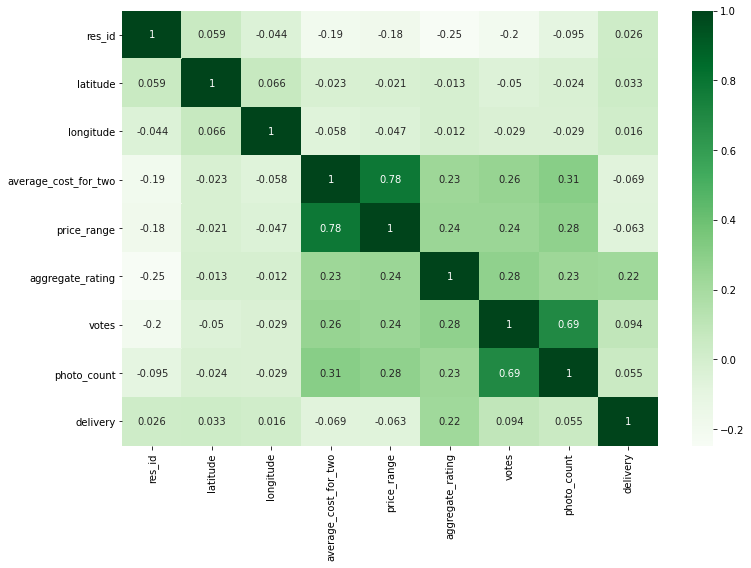

In [93]:
plt.figure(figsize=[12,8])
sns.heatmap(df1.corr(),cmap='Greens',cbar=True,annot=True)          # Heatmap of the correlation matrix.
plt.show()          

In [94]:
# region v/s average_cost_for_two (since region is a categorical variable no need of grouping/pivoting)
sns.boxplot(x='region',y='average_cost_for_two',data=df)
plt.show()

In [95]:
plt.figure(figsize=[15,6])
g=sns.barplot(x='region',y='average_cost_for_two',data=df)
for i in g.patches:
    g.annotate('{:.0f}'.format(i.get_height()),(i.get_x()+0.6,i.get_height()),ha='center',va='bottom',color='black')
plt.show()                 # bar plot uses mean as default.

In [96]:
g=sns.barplot(x='region',y='aggregate_rating',data=df,ci=None)
for i in g.patches:
    g.annotate('{:.2f}'.format(i.get_height()),(i.get_x()+0.4,i.get_height()),ha='center',va='bottom',color='black',fontsize=10)
g   

<AxesSubplot:xlabel='region', ylabel='aggregate_rating'>

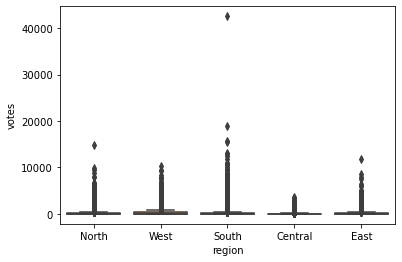

In [97]:
# region vs votes
sns.boxplot(x='region',y='votes',data=df)
plt.show()    

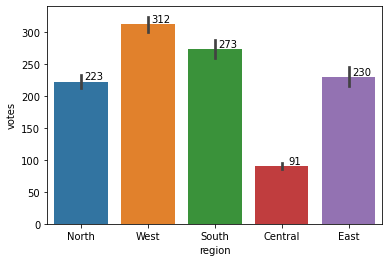

In [98]:
g=sns.barplot(x='region',y='votes',data=df)
for i in g.patches:
    g.annotate('{:.0f}'.format(i.get_height()),(i.get_x()+0.6,i.get_height()),ha='center',va='bottom',color='black')
plt.show()        # avg number of votes per region

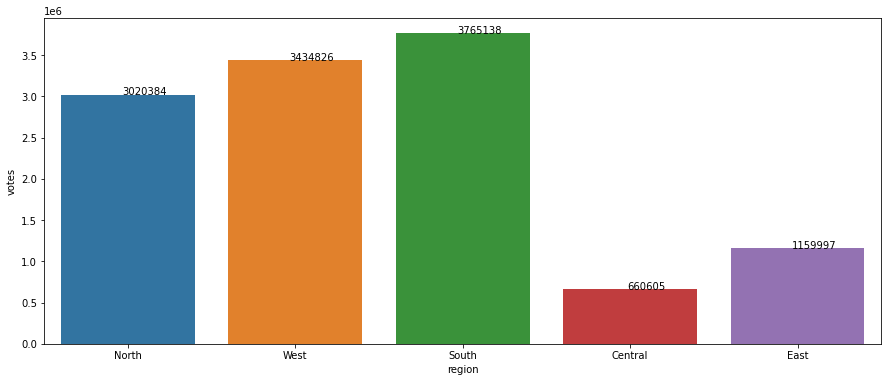

In [99]:
plt.figure(figsize=[15,6])
g=sns.barplot(x='region',y='votes',data=df,estimator=sum,ci=None)
for i in g.patches:
    g.annotate('{:.0f}'.format(i.get_height()),(i.get_x()+0.5,i.get_height()+1),ha='center',color='black')
plt.show()     # sum of votes per region.

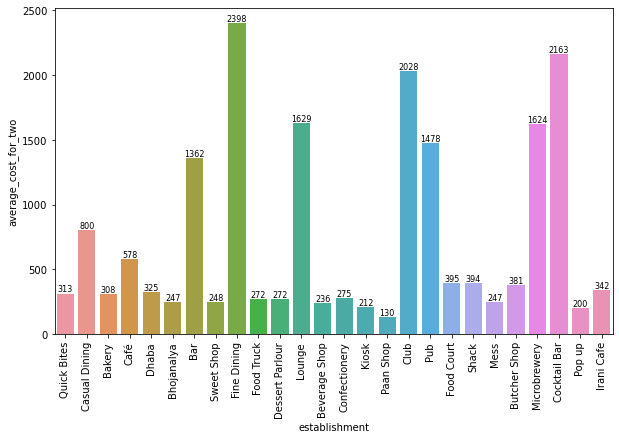

In [100]:
plt.figure(figsize=[10,6])
g=sns.barplot(x='establishment',y='average_cost_for_two',data=df,ci=None)
for i in g.patches:
    g.annotate('{:.0f}'.format(i.get_height()),(i.get_x()+0.4,i.get_height()),ha='center',va='bottom',color='black',fontsize=8)
g.set_xticklabels(g.get_xticklabels(),rotation=90)
plt.show()                              # mean value of average_cost_for_two for each establishment.

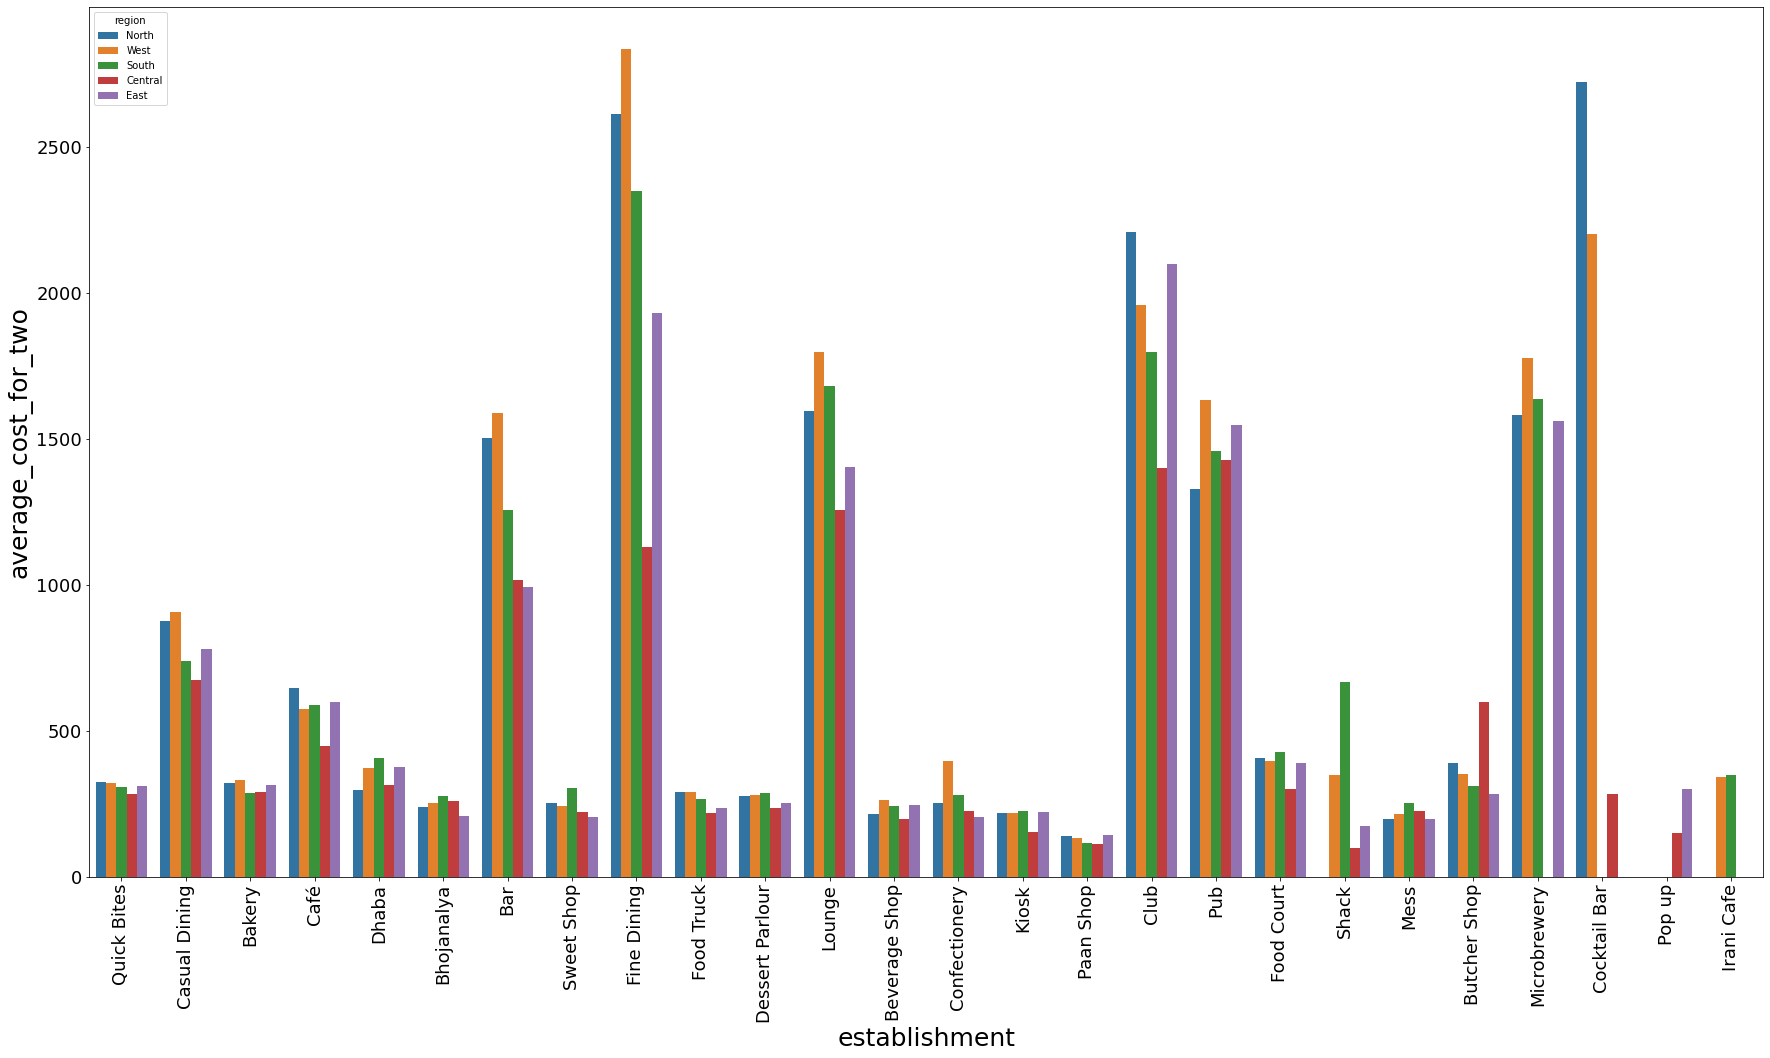

In [101]:
# establishments vs region
plt.figure(figsize=[30,16])
plt.xticks(size=18)
plt.yticks(size=18)
plt.xlabel('establishment',size=25)
plt.ylabel('average_cost_for_two',size=25)
g=sns.barplot(x='establishment',y='average_cost_for_two',hue='region',data=df,ci=None)
g.set_xticklabels(g.get_xticklabels(),rotation=90)
plt.show()

<AxesSubplot:xlabel='aggregate_rating', ylabel='photo_count'>

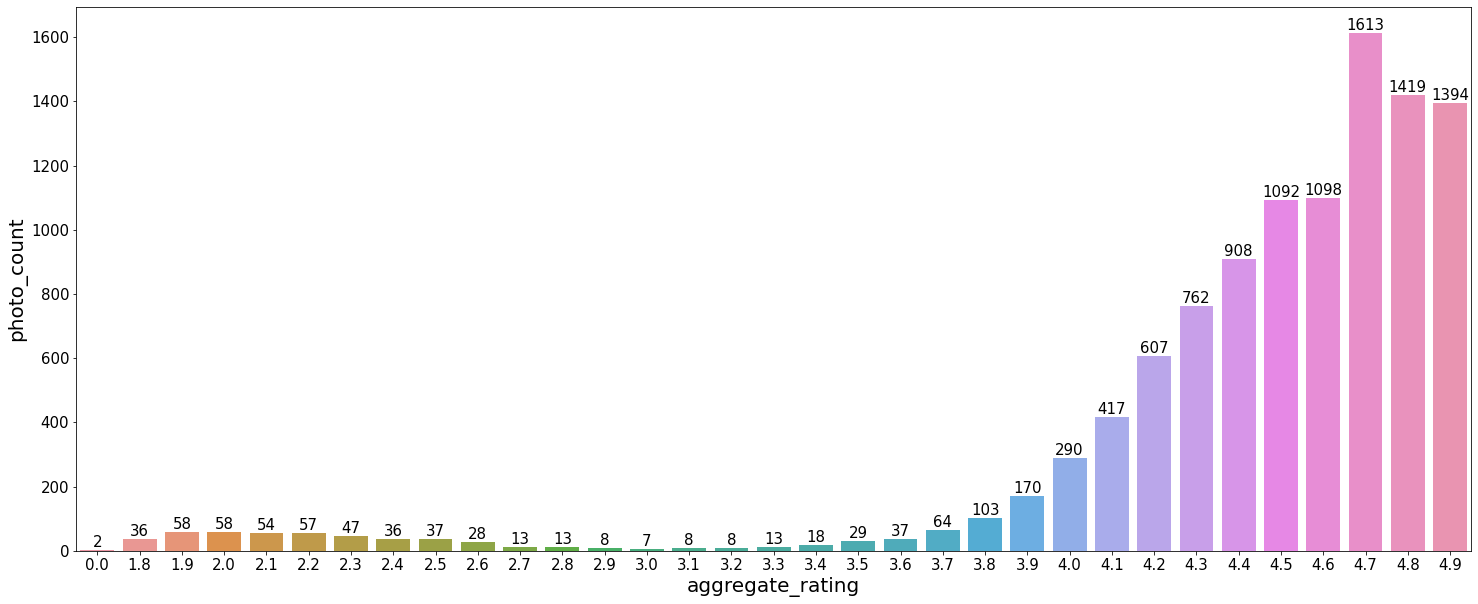

In [102]:
plt.figure(figsize=[25,10])
g=sns.barplot(x='aggregate_rating',y='photo_count',data=df,estimator=np.mean,ci=None)
plt.xticks(size=15)
plt.yticks(size=15)
plt.xlabel('aggregate_rating',size=20)
plt.ylabel('photo_count',size=20)
for i in g.patches:
    g.annotate('{:.0f}'.format(i.get_height()),(i.get_x()+0.4,i.get_height()),ha='center',va='bottom',color='black',fontsize=15)
g          # aggregate_rating v/s photo_count(mean)
# we can see that highest ratings have highest mean of photo_counts.

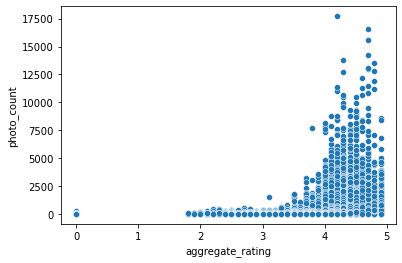

In [103]:
sns.scatterplot(x='aggregate_rating',y='photo_count',data=df)
plt.show()

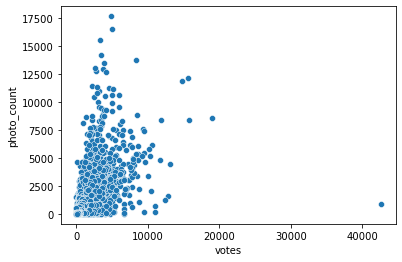

In [104]:
sns.scatterplot(x='votes',y='photo_count',data=df)
plt.show()

In [105]:
df.head(2)

res_id                            name establishment  \
0  3400299                     Bikanervala   Quick Bites   
1  3400005  Mama Chicken Mama Franky House   Quick Bites   

                                             address  city region    locality  \
0  Kalyani Point, Near Tulsi Cinema, Bypass Road,...  Agra  North    Khandari   
1        Main Market, Sadar Bazaar, Agra Cantt, Agra  Agra  North  Agra Cantt   

    latitude  longitude                                           cuisines  \
0  27.211450  78.002381  NorthIndian,SouthIndian,Mithai,StreetFood,Dess...   
1  27.160569  78.011583  NorthIndian,Mughlai,Rolls,Chinese,FastFood,Str...   

   average_cost_for_two  price_range  \
0                   700            2   
1                   600            2   

                                          highlights  aggregate_rating  \
0  Lunch,TakeawayAvailable,CreditCard,Dinner,Cash...               4.4   
1  Delivery,NoAlcoholAvailable,Dinner,TakeawayAva...               4.4   

  rating_text  votes  photo_count  opentable_support  delivery  takeaway  
0   Very Good    814          154                  0         0        -1  
1   Very Good   1203          161                  0         0        -1

<AxesSubplot:xlabel='establishment', ylabel='count'>

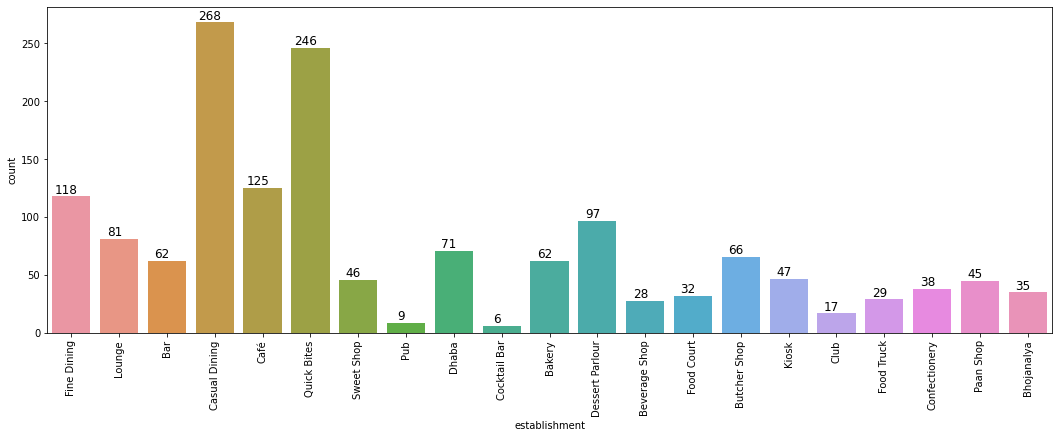

In [106]:
plt.figure(figsize=[18,6])
l=list(pd.unique(df.city))
i=df[df['city']=='New Delhi']
g=sns.countplot(x='establishment',data=i)
for i in g.patches:
    g.annotate('{:.0f}'.format(i.get_height()),(i.get_x()+0.3,i.get_height()),ha='center',va='bottom',color='black',fontsize=12)
g.set_xticklabels(g.get_xticklabels(),rotation=90)
g

<AxesSubplot:xlabel='establishment', ylabel='count'>

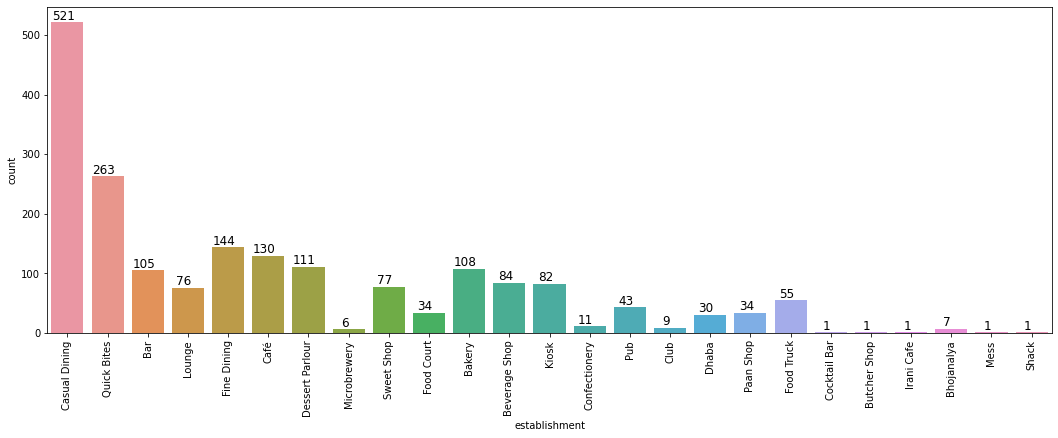

In [107]:
plt.figure(figsize=[18,6])
l=list(pd.unique(df.city))
i=df[df['city']=='Mumbai']
g=sns.countplot(x='establishment',data=i)
for i in g.patches:
    g.annotate('{:.0f}'.format(i.get_height()),(i.get_x()+0.3,i.get_height()),ha='center',va='bottom',color='black',fontsize=12)
g.set_xticklabels(g.get_xticklabels(),rotation=90)
g

<AxesSubplot:xlabel='establishment', ylabel='count'>

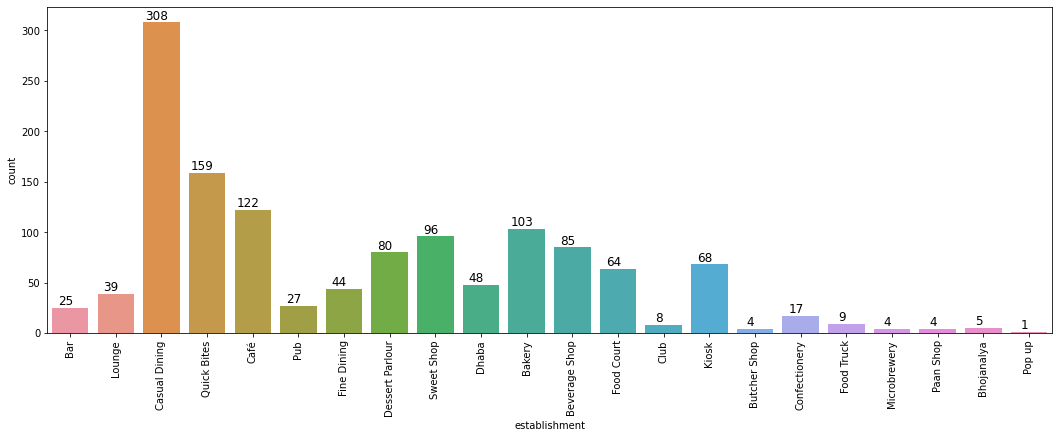

In [108]:
plt.figure(figsize=[18,6])
l=list(pd.unique(df.city))
i=df[df['city']=='Kolkata']
g=sns.countplot(x='establishment',data=i)
for i in g.patches:
    g.annotate('{:.0f}'.format(i.get_height()),(i.get_x()+0.3,i.get_height()),ha='center',va='bottom',color='black',fontsize=12)
g.set_xticklabels(g.get_xticklabels(),rotation=90)
g

In [109]:
plt.figure(figsize=[18,6])
l=list(pd.unique(df.city))
i=df[df['city']=='Chennai']
g=sns.countplot(x='establishment',data=i)
for i in g.patches:
    g.annotate('{:.0f}'.format(i.get_height()),(i.get_x()+0.3,i.get_height()),ha='center',va='bottom',color='black',fontsize=12)
g.set_xticklabels(g.get_xticklabels(),rotation=90)
g

<AxesSubplot:xlabel='establishment', ylabel='count'>

<AxesSubplot:xlabel='establishment', ylabel='count'>

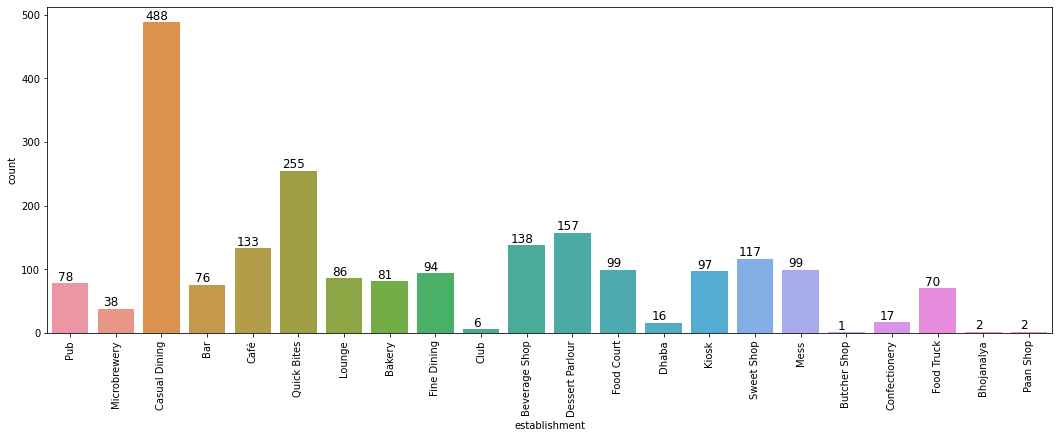

In [110]:
plt.figure(figsize=[18,6])
l=list(pd.unique(df.city))
i=df[df['city']=='Bangalore']
g=sns.countplot(x='establishment',data=i)
for i in g.patches:
    g.annotate('{:.0f}'.format(i.get_height()),(i.get_x()+0.3,i.get_height()),ha='center',va='bottom',color='black',fontsize=12)
g.set_xticklabels(g.get_xticklabels(),rotation=90)
g

<AxesSubplot:xlabel='establishment', ylabel='count'>

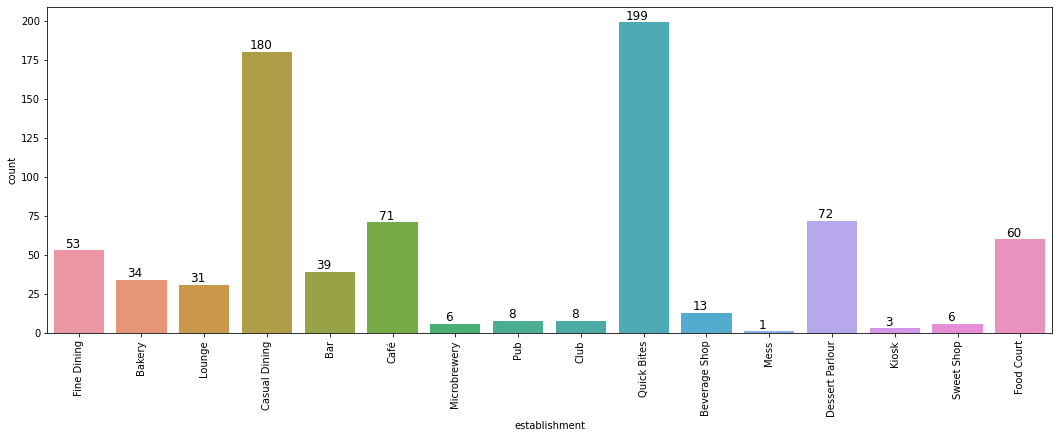

In [111]:
plt.figure(figsize=[18,6])
l=list(pd.unique(df.city))
i=df[df['city'].isin(['Hyderabad','Secundarabad'])]
g=sns.countplot(x='establishment',data=i)
for i in g.patches:
    g.annotate('{:.0f}'.format(i.get_height()),(i.get_x()+0.3,i.get_height()),ha='center',va='bottom',color='black',fontsize=12)
g.set_xticklabels(g.get_xticklabels(),rotation=90)
g

In [112]:
cuisines=[]
for i in df.cuisines:
    l=i.split(',')
    for j in l:
        if j not in cuisines:
            cuisines.append(j)
cuisines

['NorthIndian',
 'SouthIndian',
 'Mithai',
 'StreetFood',
 'Desserts',
 'Mughlai',
 'Rolls',
 'Chinese',
 'FastFood',
 'Bakery',
 'Continental',
 'Italian',
 'Pizza',
 'Cafe',
 'Burger',
 'Wraps',
 'Beverages',
 'Rajasthani',
 'Mexican',
 'HealthyFood',
 'Sandwich',
 'Salad',
 'Momos',
 'Lebanese',
 'Mediterranean',
 'Thai',
 'Gujarati',
 'Indian',
 'FingerFood',
 'European',
 'Tea',
 'Asian',
 'BarFood',
 'Kebab',
 'Biryani',
 'IceCream',
 'Paan',
 'Juices',
 'Japanese',
 'Korean',
 'Afghan',
 'Hyderabadi',
 'Lucknowi',
 'RoastChicken',
 'American',
 'BBQ',
 'Maharashtrian',
 'ModernIndian',
 'Andhra',
 'Konkan',
 'Kerala',
 'Coffee',
 'Sushi',
 'Parsi',
 'Greek',
 'Seafood',
 'FrozenYogurt',
 'Arabian',
 'Awadhi',
 'Indonesian',
 'Sindhi',
 'Goan',
 'CharcoalChicken',
 'Hotdogs',
 'DrinksOnly',
 'RawMeats',
 'Grill',
 'Malwani',
 'Cantonese',
 'Pakistani',
 'Steak',
 'Vietnamese',
 'Singaporean',
 'MiddleEastern',
 'Burmese',
 'French',
 'Kashmiri',
 'Mangalorean',
 'Malaysian',
 'Te

In [113]:
len(cuisines)

132

In [114]:
cuisine_count=np.zeros(132,dtype=int)
for i in cuisines:
    for j in df.cuisines:
        l=j.split(',')
        if i in l:
            cuisine_count[cuisines.index(i)]+=1

In [115]:
cuisine_count

array([17692,  5930,  3002,  3285,  6778,  1814,   769, 11845, 11124,
        4568,  4827,  3528,  2304,  4052,  1711,   163,  6337,   273,
         723,   605,  1414,   694,   814,   206,   315,   681,   372,
         398,  1290,   543,   388,  1032,   170,   429,  2804,  2900,
         298,  1032,   247,    53,    96,   145,    49,    47,   619,
         395,   461,   209,   335,    35,   597,   252,   101,    38,
          22,  1099,    22,   524,    51,    26,     9,   389,    15,
          10,    32,   146,     7,    56,    26,     3,    75,    57,
          16,    42,    39,    70,    34,   117,    64,    33,    25,
         216,   202,   176,    13,    11,    29,    31,    32,    15,
          29,    12,     6,    17,     4,     4,     4,    32,     2,
         165,    24,    22,    31,     8,     2,    12,     5,     3,
           6,     2,    25,     1,     2,     7,     2,     4,     2,
           4,     4,    22,     1,    36,    19,     6,     2,     1,
           5,     1,

In [116]:
cuisines=pd.DataFrame({'cuisine':cuisines,'count':cuisine_count})
cuisines.head(2)

cuisine  count
0  NorthIndian  17692
1  SouthIndian   5930

In [117]:
cuisines.sort_values(by='count',ascending=False,inplace=True)

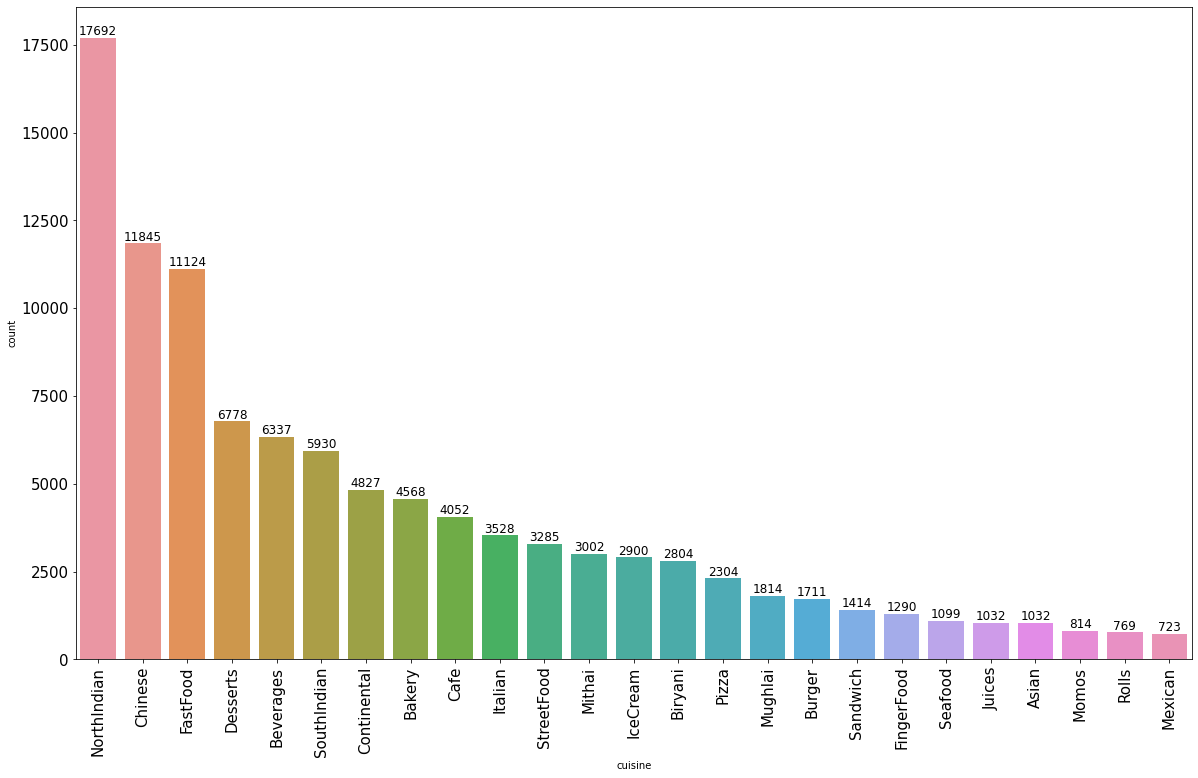

In [118]:
plt.figure(figsize=[20,12])
g=sns.barplot(x='cuisine',y='count',data=cuisines.head(25),ci=None)
g.set_xticklabels(g.get_xticklabels(),rotation=90)
plt.xticks(size=15)
plt.yticks(size=15)
for i in g.patches:
    g.annotate('{:.0f}'.format(i.get_height()),(i.get_x()+0.4,i.get_height()),ha='center',va='bottom',color='black',fontsize=12)
plt.show()

In [119]:
highlights=[]
for i in df.highlights:
    l=i.split(',')
    for j in l:
        if j not in highlights:
            highlights.append(j)
highlights

['Lunch',
 'TakeawayAvailable',
 'CreditCard',
 'Dinner',
 'Cash',
 'AirConditioned',
 'IndoorSeating',
 'PureVeg',
 'Delivery',
 'NoAlcoholAvailable',
 'Breakfast',
 'OutdoorSeating',
 'SelfService',
 'DigitalPaymentsAccepted',
 'DessertsandBakes',
 'SmokingArea',
 'DanceFloor',
 'ServesAlcohol',
 'DebitCard',
 'Wine',
 'LiveMusic',
 'Rooftop',
 'LiveSportsScreening',
 'Fullbar',
 'Beer',
 'ServesCocktails',
 'Tablebookingrecommended',
 'AvailableforFunctions',
 'RestoBar',
 'Hookah',
 'Wifi',
 'DJ',
 'LiveEntertainment',
 'CityView',
 'FreeParking',
 'FreeWifi',
 'Tablebookingnotavailable',
 'TableReservationNotRequired',
 'AxisBank-DiningDelights',
 'NoSeatingAvailable',
 'Buffet',
 'ServesJainFood',
 'Poolside',
 'Tablereservationrequired',
 'RestrictedEntry',
 'ValetParkingAvailable',
 'Sodexo',
 '4/5Star',
 'Karaoke',
 'KidFriendly',
 'PrivateDiningAreaAvailable',
 'Nightlife',
 'GlutenFreeOptions',
 'LuxuryDining',
 'WheelchairAccessible',
 'Above18Only',
 'Pre-OrderingRequired'

In [120]:
len(highlights)

103

In [121]:
highlight_count=np.zeros(len(highlights),dtype=int)
for i in highlights:
    for j in df.highlights:
        l=j.split(',')
        if i in l:
            highlight_count[highlights.index(i)]+=1
highlight_count

array([33874, 43866, 26407, 35350, 48910, 22676, 38968, 13361, 22274,
       14073, 10399,  8543,   786, 13795, 11738,  3940,   364,  3506,
       24386,   843,  1692,  1093,  2170,  5796,   914,   889,  5873,
         194,   125,   327,  4247,   736,   665,   181,  4219,  1559,
         390,  2829,  1382,  5852,  1522,   683,    96,   707,   207,
        2954,   514,  1101,   156,  1029,   555,  2350,   178,   587,
        2190,   584,   388,   194,   317,    46,   218,   524,   495,
          61,   345,  1019,   403,    47,  2285,   121,   373,    15,
        1059,   214,   224,   183,    26,   165,   213,    21,   203,
          71,    75,   146,   381,    68,   148,    78,    61,    55,
          40,    38,    21,    10,    36,     3,     3,     2,    22,
           1,     1,     1,     2])

In [122]:
highlights=pd.DataFrame({'highlight':highlights,'count':highlight_count})
highlights.head(2)

highlight  count
0              Lunch  33874
1  TakeawayAvailable  43866

In [123]:
highlights.sort_values(by='count',ascending=False,inplace=True)

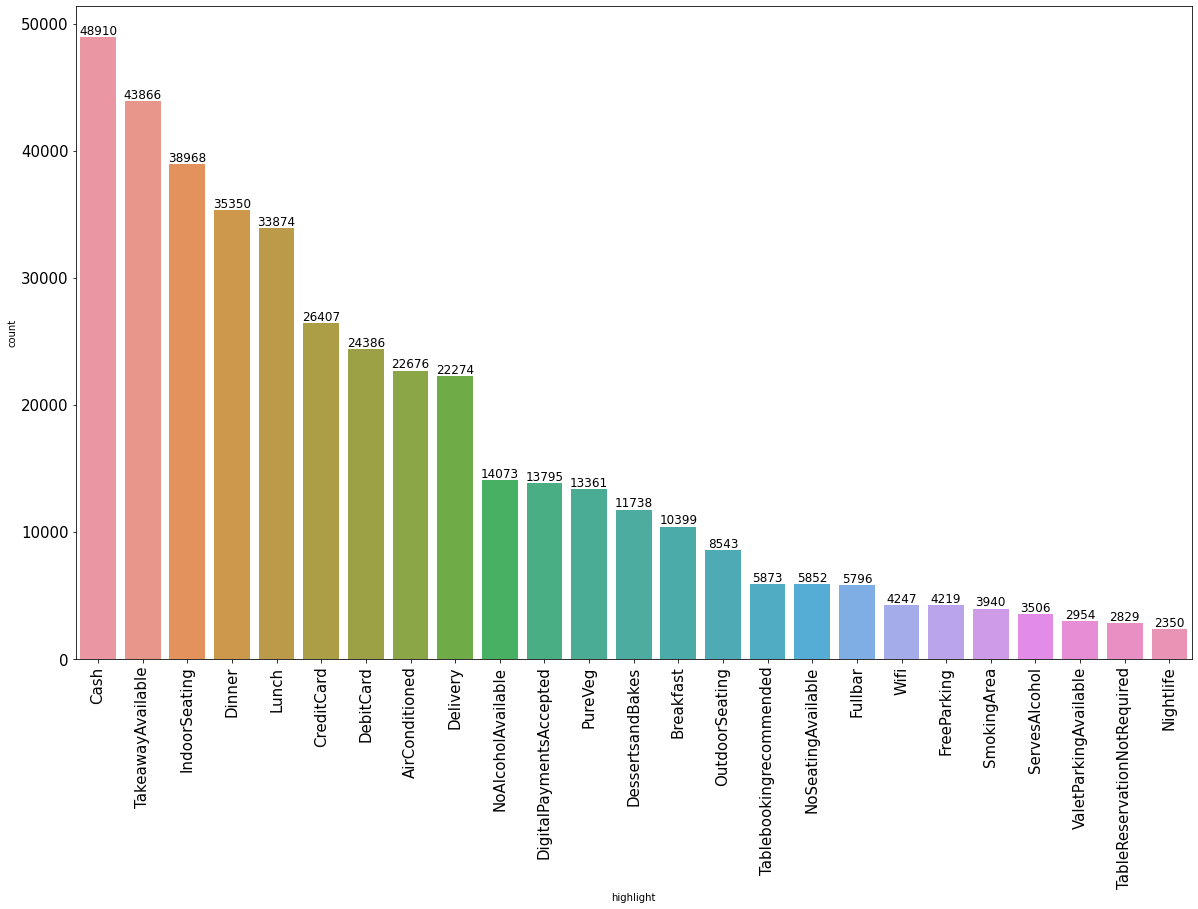

In [124]:
plt.figure(figsize=[20,12])
g=sns.barplot(x='highlight',y='count',data=highlights.head(25),ci=None)
g.set_xticklabels(g.get_xticklabels(),rotation=90)
plt.xticks(size=15)
plt.yticks(size=15)
for i in g.patches:
    g.annotate('{:.0f}'.format(i.get_height()),(i.get_x()+0.4,i.get_height()),ha='center',va='bottom',color='black',fontsize=12)
plt.show()

###  In the same way,We can seperate data for different cities and perform operations to visualize.

In [125]:
h=df.pivot_table(index='establishment',columns='region',values=['average_cost_for_two'],aggfunc='mean')
h.replace({np.nan:0},inplace=True)
h

average_cost_for_two                                         \
region                       Central         East        North        South   
establishment                                                                 
Bakery                    292.341137   313.290155   321.141304   288.338338   
Bar                      1018.258427   992.045455  1503.616352  1254.739336   
Beverage Shop             200.000000   247.654321   213.978947   241.460235   
Bhojanalya                260.526316   207.000000   240.304348   277.777778   
Butcher Shop              600.000000   283.333333   388.976378   312.500000   
Café                      446.751880   597.621777   646.393597   589.473684   
Casual Dining             674.581749   780.044444   875.435086   740.784595   
Club                     1400.000000  2100.000000  2208.823529  1796.666667   
Cocktail Bar              283.333333     0.000000  2720.000000     0.000000   
Confectionery             225.000000   206.250000   252.330097   280.851064   
Dessert Parlour           235.678947   253.940397   277.834793   287.744015   
Dhaba                     314.841270   377.340426   295.953757   407.777778   
Fine Dining              1128.861789  1931.308411  2612.817552  2347.661470   
Food Court                301.777778   389.500000   407.671233   427.529716   
Food Truck                217.200000   237.037037   291.855204   266.917293   
Irani Cafe                  0.000000     0.000000     0.000000   350.000000   
Kiosk                     152.651515   223.529412   217.432950   224.075472   
Lounge                   1254.807692  1403.225806  1594.444444  1681.313131   
Mess                      225.000000   200.000000   200.000000   254.006969   
Microbrewery                0.000000  1560.000000  1582.978723  1636.956522   
Paan Shop                 111.475410   144.444444   138.672566   115.000000   
Pop up                    150.000000   300.000000     0.000000     0.000000   
Pub                      1427.272727  1546.774194  1326.785714  1457.777778   
Quick Bites               282.718351   311.698187   326.664809   308.136377   
Shack                     100.000000   175.000000     0.000000   666.666667   
Sweet Shop                221.350711   205.416667   254.557292   305.169713   

                              
region                  West  
establishment                 
Bakery            332.538462  
Bar              1587.960340  
Beverage Shop     264.157706  
Bhojanalya        254.224138  
Butcher Shop      353.846154  
Café              575.740944  
Casual Dining     905.748569  
Club             1959.375000  
Cocktail Bar     2200.000000  
Confectionery     398.484848  
Dessert Parlour   279.461039  
Dhaba             374.516729  
Fine Dining      2836.129032  
Food Court        395.798319  
Food Truck        290.636042  
Irani Cafe        341.666667  
Kiosk             217.166667  
Lounge           1797.938144  
Mess              214.285714  
Microbrewery     1777.272727  
Paan Shop         131.739130  
Pop up              0.000000  
Pub              1633.333333  
Quick Bites       323.228286  
Shack             350.000000  
Sweet Shop        244.207836

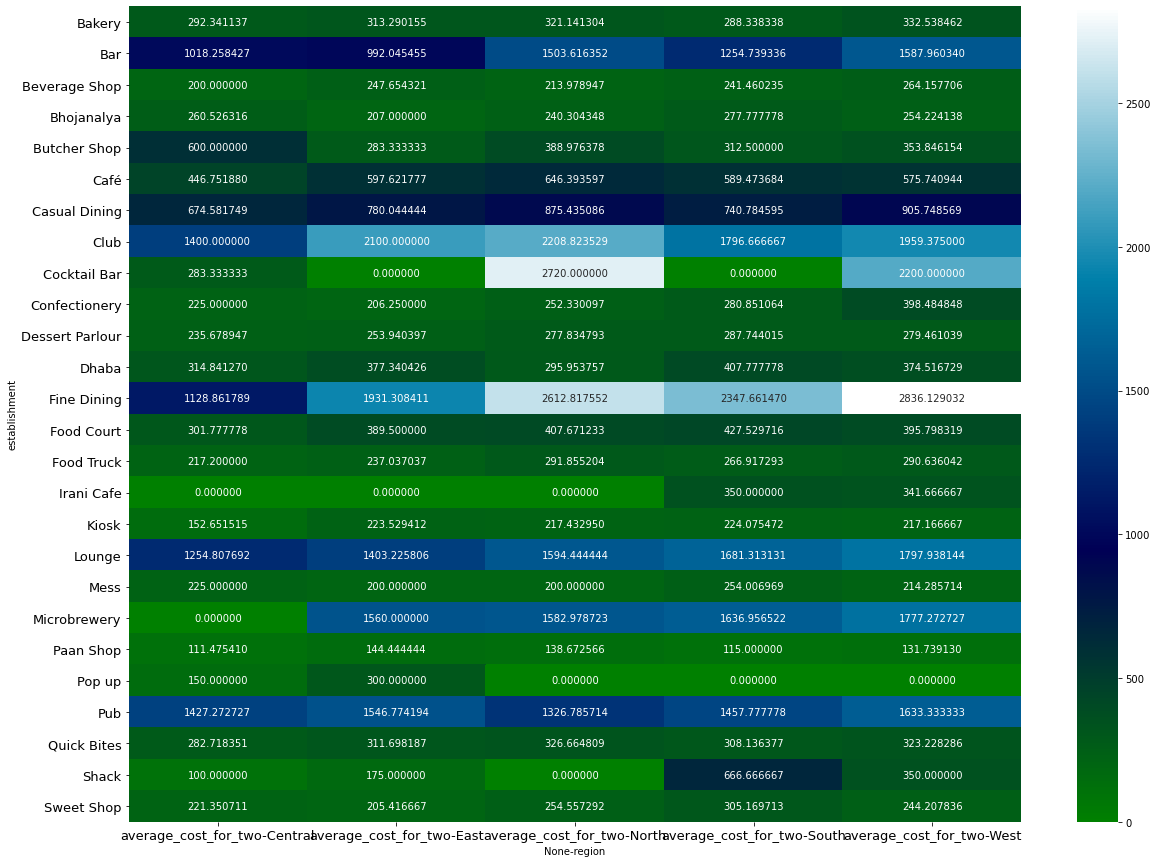

In [126]:
plt.figure(figsize=[20,15])
sns.heatmap(h,annot=True,fmt='f',cmap='ocean')
plt.xticks(size=13)
plt.yticks(size=13)
plt.show()

In [127]:
i=df.pivot_table(index='establishment',columns='region',values=['photo_count'],aggfunc='mean')
i.replace({np.nan:0},inplace=True)
i

photo_count                                         \
region              Central         East        North        South   
establishment                                                        
Bakery            19.488294   102.538860    94.361957    71.748749   
Bar               27.651685   288.628788   601.704403   232.971564   
Beverage Shop     10.400673    48.950617    31.338947    28.752282   
Bhojanalya         2.093567     1.400000     2.313043     2.111111   
Butcher Shop       0.000000    31.166667    24.259843    11.500000   
Café              61.348872   536.532951   387.434087   366.256579   
Casual Dining     39.567807   463.395556   340.149137   246.185117   
Club              16.000000   114.600000    65.235294   187.533333   
Cocktail Bar       5.333333     0.000000   559.100000     0.000000   
Confectionery      3.666667    13.791667     8.281553     2.893617   
Dessert Parlour   18.207018    98.933775    79.419274   116.992634   
Dhaba              3.444444    85.872340    11.565029    23.200000   
Fine Dining       60.276423   467.663551   356.270208   287.799555   
Food Court         6.127778    58.150000    59.167123    43.521964   
Food Truck         3.376000    10.833333    17.199095     9.270677   
Irani Cafe         0.000000     0.000000     0.000000     9.000000   
Kiosk              4.848485    21.098039    16.501916    16.641509   
Lounge            26.807692   210.483871   807.329861   274.464646   
Mess               0.590909     0.000000     3.500000    10.832753   
Microbrewery       0.000000  1500.200000  2241.106383  2197.717391   
Paan Shop          2.065574     8.444444    13.336283     3.100000   
Pop up             0.000000     0.000000     0.000000     0.000000   
Pub               54.000000   952.290323   711.500000   601.488889   
Quick Bites       21.068204    67.085492    56.725053    40.881646   
Shack              0.000000     0.000000     0.000000    14.333333   
Sweet Shop         6.099526    57.559524    49.609375    47.449086   

                              
region                  West  
establishment                 
Bakery            125.429231  
Bar              1097.881020  
Beverage Shop      41.338710  
Bhojanalya          1.801724  
Butcher Shop       12.923077  
Café              429.883644  
Casual Dining     495.140638  
Club              101.937500  
Cocktail Bar     1641.000000  
Confectionery      14.939394  
Dessert Parlour   150.215584  
Dhaba              17.936803  
Fine Dining       701.416129  
Food Court         44.470588  
Food Truck         23.809187  
Irani Cafe        191.583333  
Kiosk              10.920000  
Lounge            621.087629  
Mess                3.057143  
Microbrewery      972.545455  
Paan Shop           9.065217  
Pop up              0.000000  
Pub               688.344444  
Quick Bites        99.928132  
Shack               4.500000  
Sweet Shop         31.362862

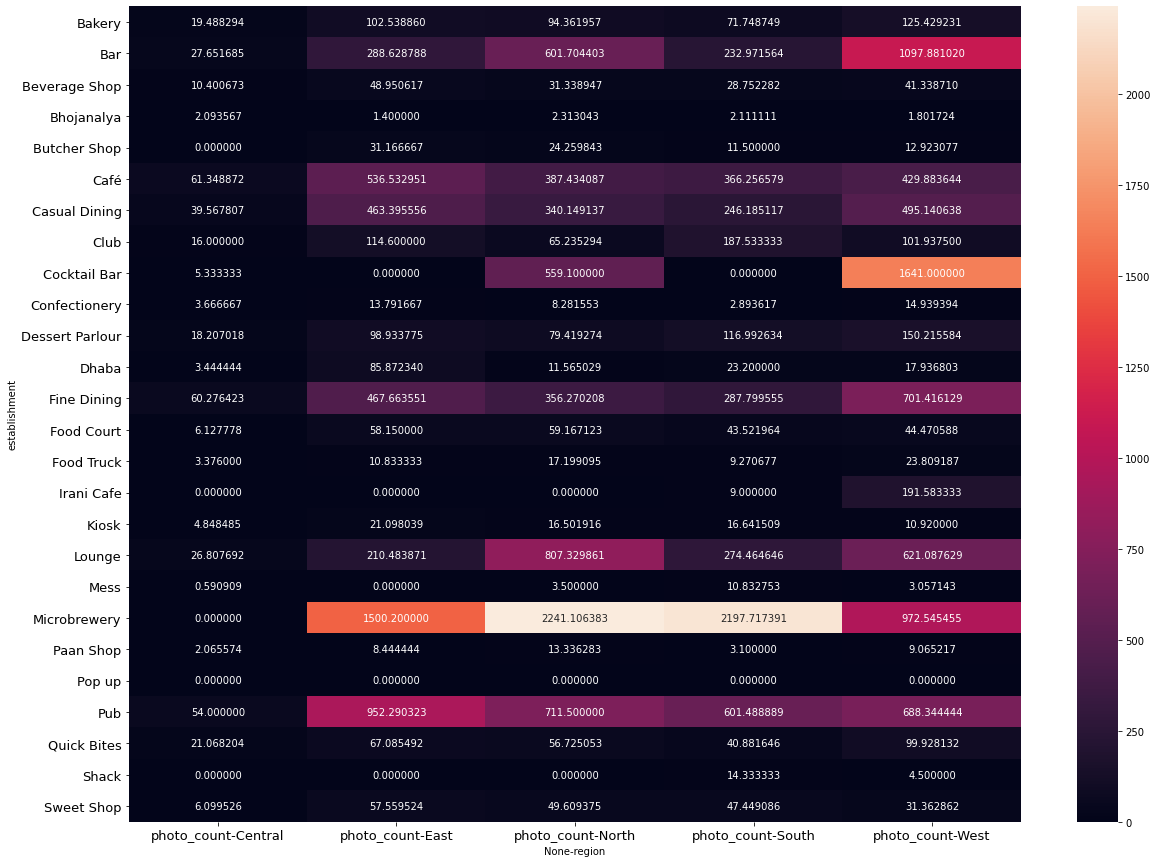

In [128]:
plt.figure(figsize=[20,15])
sns.heatmap(i,annot=True,fmt='f')
plt.xticks(size=13)
plt.yticks(size=13)
plt.show()

In [129]:
j=df.pivot_table(index='establishment',columns='region',values=['votes'],aggfunc='sum')
j.replace({np.nan:0},inplace=True)
j

votes                                          
region            Central      East     North      South       West
establishment                                                      
Bakery            19962.0   33960.0  103411.0    76905.0    86658.0
Bar                4642.0   33071.0  128180.0   158727.0   375178.0
Beverage Shop     10744.0   12578.0   28128.0    43244.0    40022.0
Bhojanalya         3737.0     329.0    5834.0      336.0     1214.0
Butcher Shop         26.0     155.0    7682.0        7.0      202.0
Café              60484.0  122103.0  310496.0   304522.0   339268.0
Casual Dining    220962.0  518748.0  919667.0  1786011.0  1399604.0
Club                227.0    3354.0    6771.0    16171.0     7064.0
Cocktail Bar         46.0       0.0    4210.0        0.0      669.0
Confectionery        32.0     245.0    1350.0      138.0      498.0
Dessert Parlour   20096.0   28616.0   82802.0   174849.0   130785.0
Dhaba              4632.0   20323.0   80063.0     3392.0    12164.0
Fine Dining       11514.0   37040.0  125572.0   113786.0   160535.0
Food Court         4630.0   12487.0   36015.0    37712.0    24376.0
Food Truck         3011.0    2508.0    7692.0     3162.0    12768.0
Irani Cafe            0.0       0.0       0.0       79.0     2327.0
Kiosk              2728.0    4744.0   10359.0    10148.0     8127.0
Lounge             4153.0   16856.0  205787.0    87549.0    90753.0
Mess                 84.0       2.0     230.0    12330.0      393.0
Microbrewery          0.0    6684.0   50626.0   152096.0     9745.0
Paan Shop           652.0     180.0    2021.0       56.0     1109.0
Pop up               27.0       1.0       0.0        0.0        0.0
Pub                1588.0   27586.0   52490.0   153396.0    79081.0
Quick Bites      264735.0  248688.0  743980.0   599901.0   609924.0
Shack                 0.0       2.0       0.0       18.0       16.0
Sweet Shop        21893.0   29737.0  107018.0    30603.0    42346.0

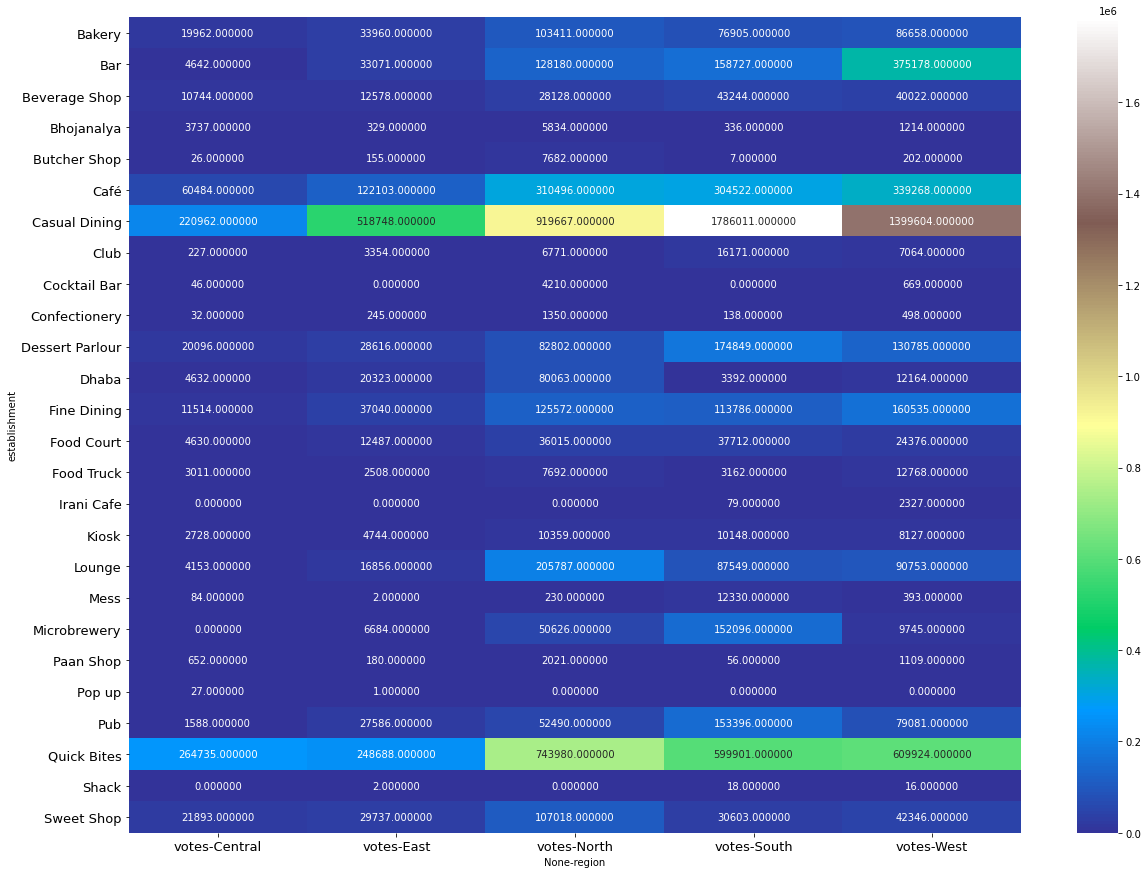

In [130]:
plt.figure(figsize=[20,15])
sns.heatmap(j,annot=True,fmt='f',cmap='terrain')
plt.xticks(size=13)
plt.yticks(size=13)
plt.show()

In [131]:
k=df.pivot_table(index='establishment',columns='region',values=['aggregate_rating'],aggfunc='mean')
k.replace({np.nan:0},inplace=True)
k

aggregate_rating                                        
region                   Central      East     North     South      West
establishment                                                           
Bakery                  2.284448  2.726166  2.787065  2.369269  3.113385
Bar                     2.526966  2.929545  3.140566  2.883886  3.639377
Beverage Shop           2.453872  3.125926  2.330316  2.634289  2.849642
Bhojanalya              1.841520  1.124000  1.527391  2.300000  1.391379
Butcher Shop            3.500000  2.700000  3.324409  0.825000  2.346154
Café                    3.024361  3.415473  3.304426  3.446272  3.340285
Casual Dining           3.215970  3.499200  3.326993  3.330574  3.596607
Club                    3.633333  3.630000  3.196078  3.553333  3.575000
Cocktail Bar            1.266667  0.000000  4.060000  0.000000  4.350000
Confectionery           1.633333  1.558333  1.895146  0.640426  1.539394
Dessert Parlour         2.532456  3.160596  3.129662  3.266575  3.391429
Dhaba                   2.248413  2.423404  2.810838  2.637778  2.187732
Fine Dining             2.808943  3.636449  3.613857  3.711359  3.756452
Food Court              1.937222  3.115000  2.831781  2.803101  2.649860
Food Truck              1.825600  1.900000  2.866968  2.169173  2.499647
Irani Cafe              0.000000  0.000000  0.000000  3.600000  3.216667
Kiosk                   2.221970  2.451961  2.577395  2.743019  1.879667
Lounge                  3.161538  3.482258  3.580903  3.353030  3.617526
Mess                    0.750000  0.000000  1.875000  2.383275  1.005714
Microbrewery            0.000000  4.100000  4.242553  4.439130  4.127273
Paan Shop               1.811475  2.300000  2.140708  1.990000  1.878261
Pop up                  3.600000  0.000000  0.000000  0.000000  0.000000
Pub                     3.618182  3.793548  3.509524  3.907407  3.837778
Quick Bites             3.158145  2.983484  3.064331  2.968970  3.327863
Shack                   0.000000  1.800000  0.000000  1.966667  1.400000
Sweet Shop              2.357820  2.527976  2.761589  2.949347  2.968313

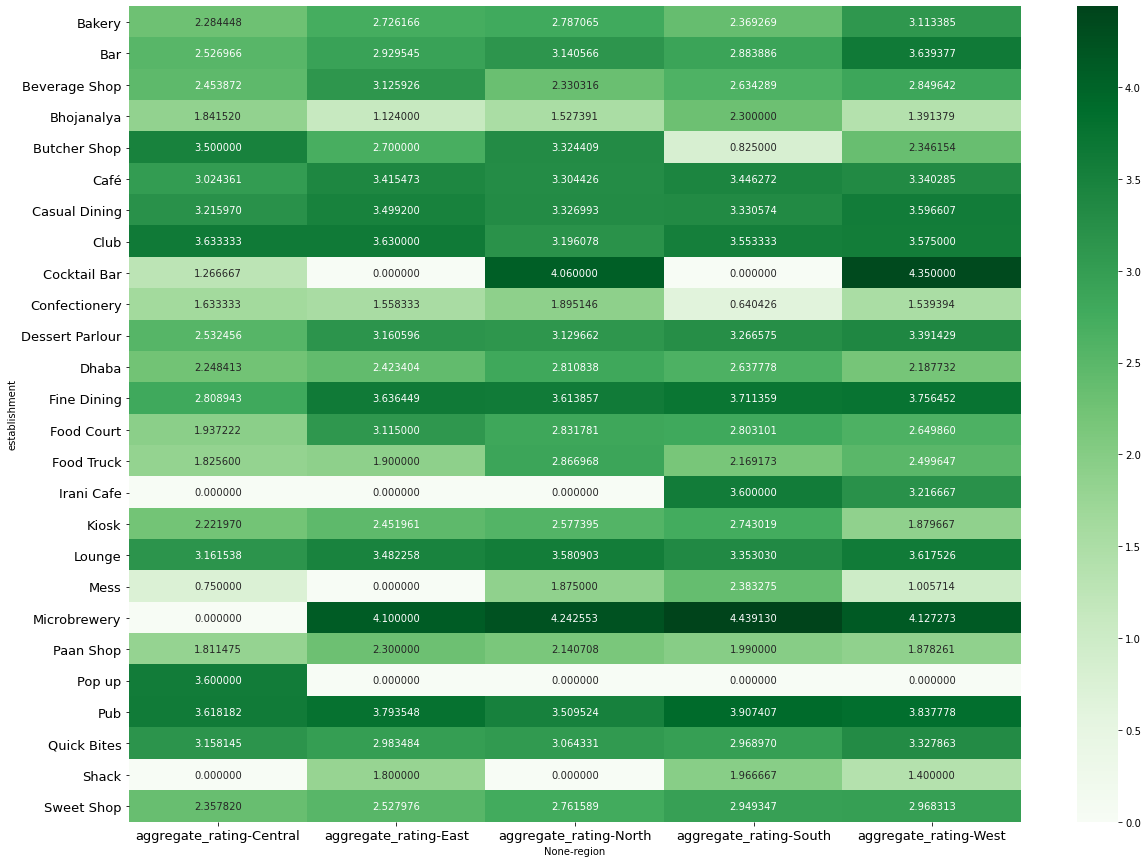

In [132]:
plt.figure(figsize=[20,15])
sns.heatmap(k,annot=True,fmt='f',cmap='Greens')
plt.xticks(size=13)
plt.yticks(size=13)
plt.show()

In [133]:
k=df.pivot_table(index='region',values=['aggregate_rating'],aggfunc='mean')
k.replace({np.nan:0},inplace=True)
k.reset_index(inplace=True)
k

region  aggregate_rating
0  Central          2.812108
1     East          3.062287
2    North          3.038518
3    South          3.064477
4     West          3.212187

In [134]:
g=sns.barplot(x='region',y='aggregate_rating',data=k)
for i in g.patches:
    g.annotate('{:.2f}'.format(i.get_height()),(i.get_x()+0.4,i.get_height()),ha='center',va='bottom',color='black',fontsize=12)
plt.show()

In [135]:
l=df.pivot_table(index='establishment',values=['aggregate_rating'],aggfunc='mean')
l.replace({np.nan:0},inplace=True)
l.reset_index(inplace=True)
l

establishment  aggregate_rating
0            Bakery          2.638080
1               Bar          3.129376
2     Beverage Shop          2.635104
3        Bhojanalya          1.570313
4      Butcher Shop          3.150331
5              Café          3.308156
6     Casual Dining          3.387602
7              Club          3.400000
8      Cocktail Bar          3.540000
9     Confectionery          1.517840
10  Dessert Parlour          3.135101
11            Dhaba          2.580261
12      Fine Dining          3.607806
13       Food Court          2.699448
14       Food Truck          2.402328
15       Irani Cafe          3.246154
16            Kiosk          2.365000
17           Lounge          3.497859
18             Mess          2.129513
19     Microbrewery          4.307339
20        Paan Shop          1.985263
21           Pop up          2.400000
22              Pub          3.775214
23      Quick Bites          3.097056
24            Shack          1.537500
25       Sweet Shop          2.739303

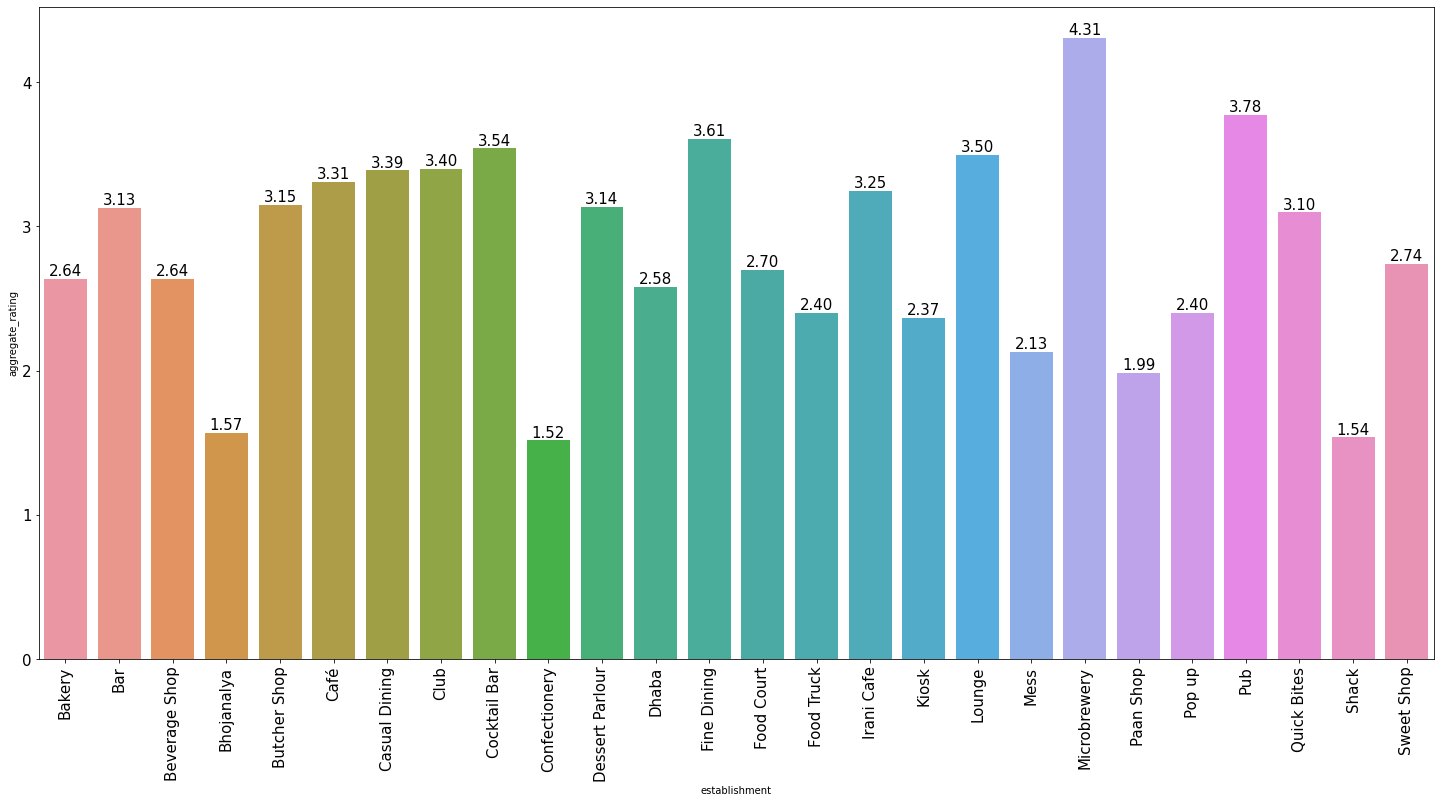

In [136]:
plt.figure(figsize=[25,12])
g=sns.barplot(x='establishment',y='aggregate_rating',data=l)
g.set_xticklabels(g.get_xticklabels(),rotation=90)
plt.xticks(size=15)
plt.yticks(size=15)
for i in g.patches:
    g.annotate('{:.2f}'.format(i.get_height()),(i.get_x()+0.4,i.get_height()),ha='center',va='bottom',color='black',fontsize=15)
plt.show()